In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [296]:
#인코딩시 자동으로 인코딩 감지하여 불러오기
import chardet

with open("/Users/hongminhwa/Desktop/baf/SeoulBikeData.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

data = pd.read_csv("/Users/hongminhwa/Desktop/baf/SeoulBikeData.csv", encoding=result['encoding'])

In [297]:
import chardet

with open("/Users/hongminhwa/Desktop/baf/train.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

data2 = pd.read_csv("/Users/hongminhwa/Desktop/baf/train.csv")

In [298]:
data3 = data2.copy() #원본데이터 유지

In [299]:
#원본데이터 복사
data1 = data.copy()

In [300]:
data3 = data3.rename(columns = {'Temperature(째C)' :'Temperature(°C)','Dew point temperature(째C)': 'Dew point temperature(°C)'})

In [301]:
data3

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [302]:
#데이터 보기
data3.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [303]:
#중복행 없음
data3[data3.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [304]:
#기술 통계량 확인
data3.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [305]:
data3.shape

(8040, 14)

In [306]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(°C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(°C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [307]:
#결측치만 확인 = 온도, 풍속, 계절별로 원자료 10%의 결측치가 존재함을 확인
data3.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [308]:
# 온도 데이터 결측치 확인 
missing_temp = data3[data3['Temperature(°C)'].isnull()]

missing_temp

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6,01/12/2017,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
21,01/12/2017,405,21,NaN,81,0.8,1687,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes
22,01/12/2017,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes
23,01/12/2017,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,31/10/2018,141,5,NaN,74,NaN,2000,-0.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8025,31/10/2018,996,9,NaN,56,1.8,1825,-2.9,0.89,0.0,0.0,Autumn,No Holiday,Yes
8027,31/10/2018,818,11,NaN,41,2.6,1907,-3.8,1.96,0.0,0.0,Autumn,No Holiday,Yes
8031,31/10/2018,994,15,NaN,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes


In [309]:
# date변수 datetime 형식으로 변경
data3['Date'] = pd.to_datetime(data3['Date'], format='%d/%m/%Y')

# 날짜 데이터의 최솟값과 최댓값
min_date = data3['Date'].min()
max_date = data3['Date'].max()
# Date 열을 월 정보로 변환
data3['Month'] = data3['Date'].dt.to_period('M')


# 날짜 열을 이용하여 월 정보 추출
#data3['Month'] = data3['Date'].dt.month

# 각 월별 평균 기온 계산
#monthly_avg_temp = data3.groupby('Month')['Temperature(°C)'].mean()

# 결측치를 해당 월의 평균 기온으로 대체
#for month, avg_temp in monthly_avg_temp.items():
    #data3.loc[(data3['Month'] == month) & (data3['Temperature(°C)'].isnull()), 'Temperature(°C)'] = avg_temp


#print(data3)

## 이렇게 하면, 평균기온 때문에, 기온 이상치가 발생하게 됨. 따라서, 앞뒤 행을 기준으로 대체

# 온도 결측치 처리

In [310]:
# 전후 값의 평균으로 대체
data3['Temperature(°C)'] = data3['Temperature(°C)'].fillna((data3['Temperature(°C)'].shift() + data3['Temperature(°C)'].shift(-1)) / 2)

# 연속된 결측치 처리
window_size = 5
data3['Temperature(°C)'] = data3['Temperature(°C)'].fillna(data3['Temperature(°C)'].rolling(window=window_size, min_periods=1, center=True).mean())
print(data3['Temperature(°C)'].isna().sum()) #결측치 처리 완료

0


In [311]:
data3.isna().sum() #잘 대체 됨.

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
Month                          0
dtype: int64

# 풍속 결측치 처리

In [312]:
# 풍속 결측치 확인
missing_wind = data3[data3['Wind speed (m/s)'].isnull()]

missing_wind

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
4,2017-12-01,78,4,-6.00,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017-12
16,2017-12-01,484,16,1.20,54,NaN,793,-7.0,0.24,0.0,0.0,Winter,No Holiday,Yes,2017-12
23,2017-12-01,323,23,-2.20,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017-12
43,2017-12-02,385,19,5.00,52,NaN,1666,-4.0,0.00,0.0,0.0,Winter,No Holiday,Yes,2017-12
49,2017-12-03,227,1,3.90,69,NaN,485,-1.2,0.00,0.0,0.0,Winter,No Holiday,Yes,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,2018-10-31,141,5,4.30,74,NaN,2000,-0.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018-10
8031,2018-10-31,994,15,11.85,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes,2018-10
8032,2018-10-31,1185,16,11.80,34,NaN,1979,-3.5,1.16,0.0,0.0,Autumn,No Holiday,Yes,2018-10
8034,2018-10-31,2094,18,9.85,48,NaN,2000,-1.0,0.03,0.0,0.0,Autumn,No Holiday,Yes,2018-10


In [313]:
#그래프를 확인하면, 같은 겨울 이라고 해도, 풍속의 차이가 존재하므로, 월별 풍속으로 대체한다.
# 각 월별 평균 풍속 계산
monthly_avg_wind = data3.groupby('Month')['Wind speed (m/s)'].mean()

# 결측치를 해당 월의 평균 기온으로 대체
for month, avg_wind in monthly_avg_wind.items():
    data3.loc[(data3['Month'] == month) & (data3['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = avg_wind


print(data3)

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8035 2018-10-31               1507    19              8.4           53   
8036 2018-10-31               1176    20              7.6           59   
8037 2018-10-31               1069    21              7.6           59   
8038 2018-10-31               1088    22              6.8           58   
8039 2018-10-31                798    23              6.4           60   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200000              2000

In [314]:
data3.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
Month                          0
dtype: int64

In [315]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(°C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(°C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    7238 non-null   object        
 12  Holida

# 계절 결측치 대체 
 ## 2017년~ 2018년 입동, 입춘, 입하, 입추 기준 날짜로 대체(도메인)

In [316]:
# 2017년 12월 1일부터, 2018년 11월 30일까지의 데이터이므로, 
# 2017-12~ 2018-11 까지의 달력 기준 입동 입춘 입하 입추 날짜를 이용하여 대체
# 각 계절의 시작과 끝 날짜 정의
seasons_dates = [
    ('Winter', '2017-12-01', '2018-02-03'),
    ('Spring', '2018-02-04', '2018-05-04'),
    ('Summer', '2018-05-05', '2018-08-06'),
    ('Autumn', '2018-08-07', '2018-11-06'),
    ('Winter', '2018-11-07', '2018-11-30'),
]

# 각 계절에 해당하는 날짜 범위를 이용하여 결측치 대체
for Seasons, start_date, end_date in seasons_dates:
    mask = (data3['Date'] >= start_date) & (data3['Date'] <= end_date)
    data3.loc[mask, 'Seasons'] = data3.loc[mask, 'Seasons'].fillna(Seasons)

# 결과 확인
print(data3)

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8035 2018-10-31               1507    19              8.4           53   
8036 2018-10-31               1176    20              7.6           59   
8037 2018-10-31               1069    21              7.6           59   
8038 2018-10-31               1088    22              6.8           58   
8039 2018-10-31                798    23              6.4           60   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200000              2000

In [317]:
data3.isna().sum() #결측치 대체 완료

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
dtype: int64

### 상관계수 확인 해보기

Text(0.5, 1.0, 'heatmap corr')

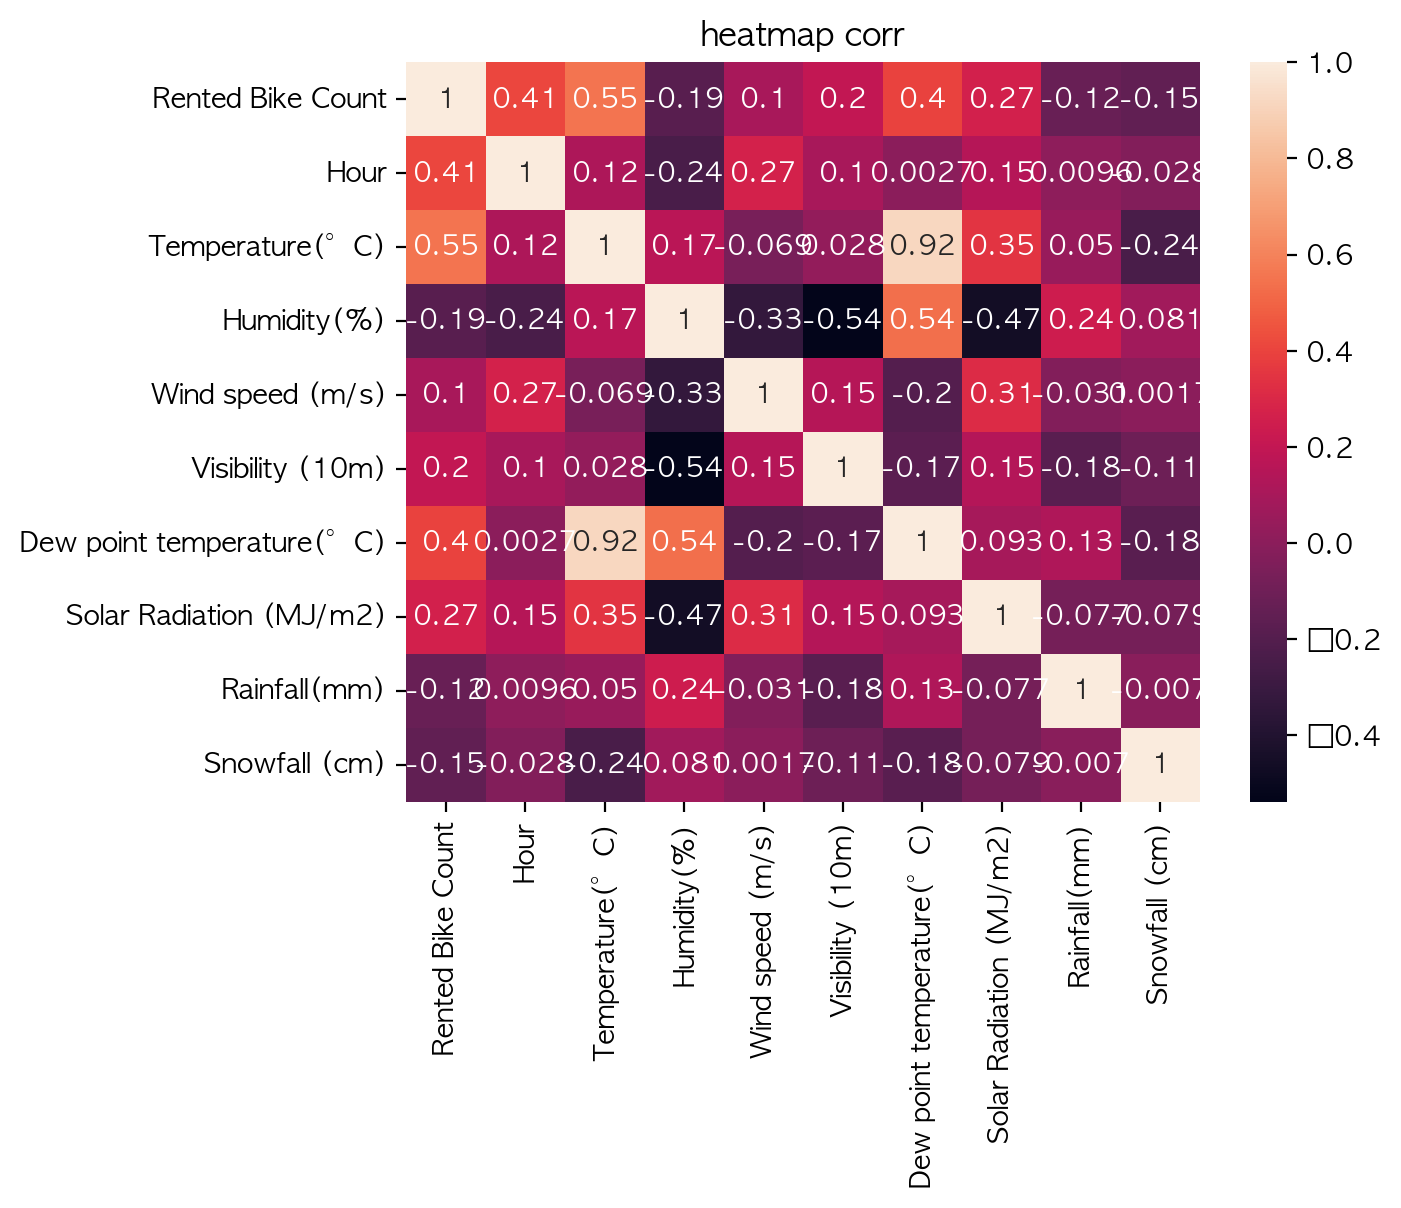

In [318]:
#변수별 상관계수 확인
data_num=data3._get_numeric_data()
sns.heatmap(data_num.corr(),annot=True)
plt.title('heatmap corr')

# Date

In [319]:
# date변수 datetime 형식으로 변경
data3['Date'] = pd.to_datetime(data3['Date'], format='%d/%m/%Y')

# 날짜 데이터의 최솟값과 최댓값
min_date = data3['Date'].min()
max_date = data3['Date'].max()

print(f"날짜의 최솟값: {min_date}")
print(f"날짜의 최댓값: {max_date}")

# 날짜의 기간
date_range = max_date - min_date
print(f"날짜의 기간: {date_range}")

날짜의 최솟값: 2017-12-01 00:00:00
날짜의 최댓값: 2018-10-31 00:00:00
날짜의 기간: 334 days 00:00:00


# Date 변수는 2017-12-01 부터 2018-11-30 까지의 총 364일의 정보가 있다.

# Rented Bike Count

In [320]:
data3['Rented Bike Count'].unique()

array([ 254,  204,  173, ..., 1228,  838, 1907])

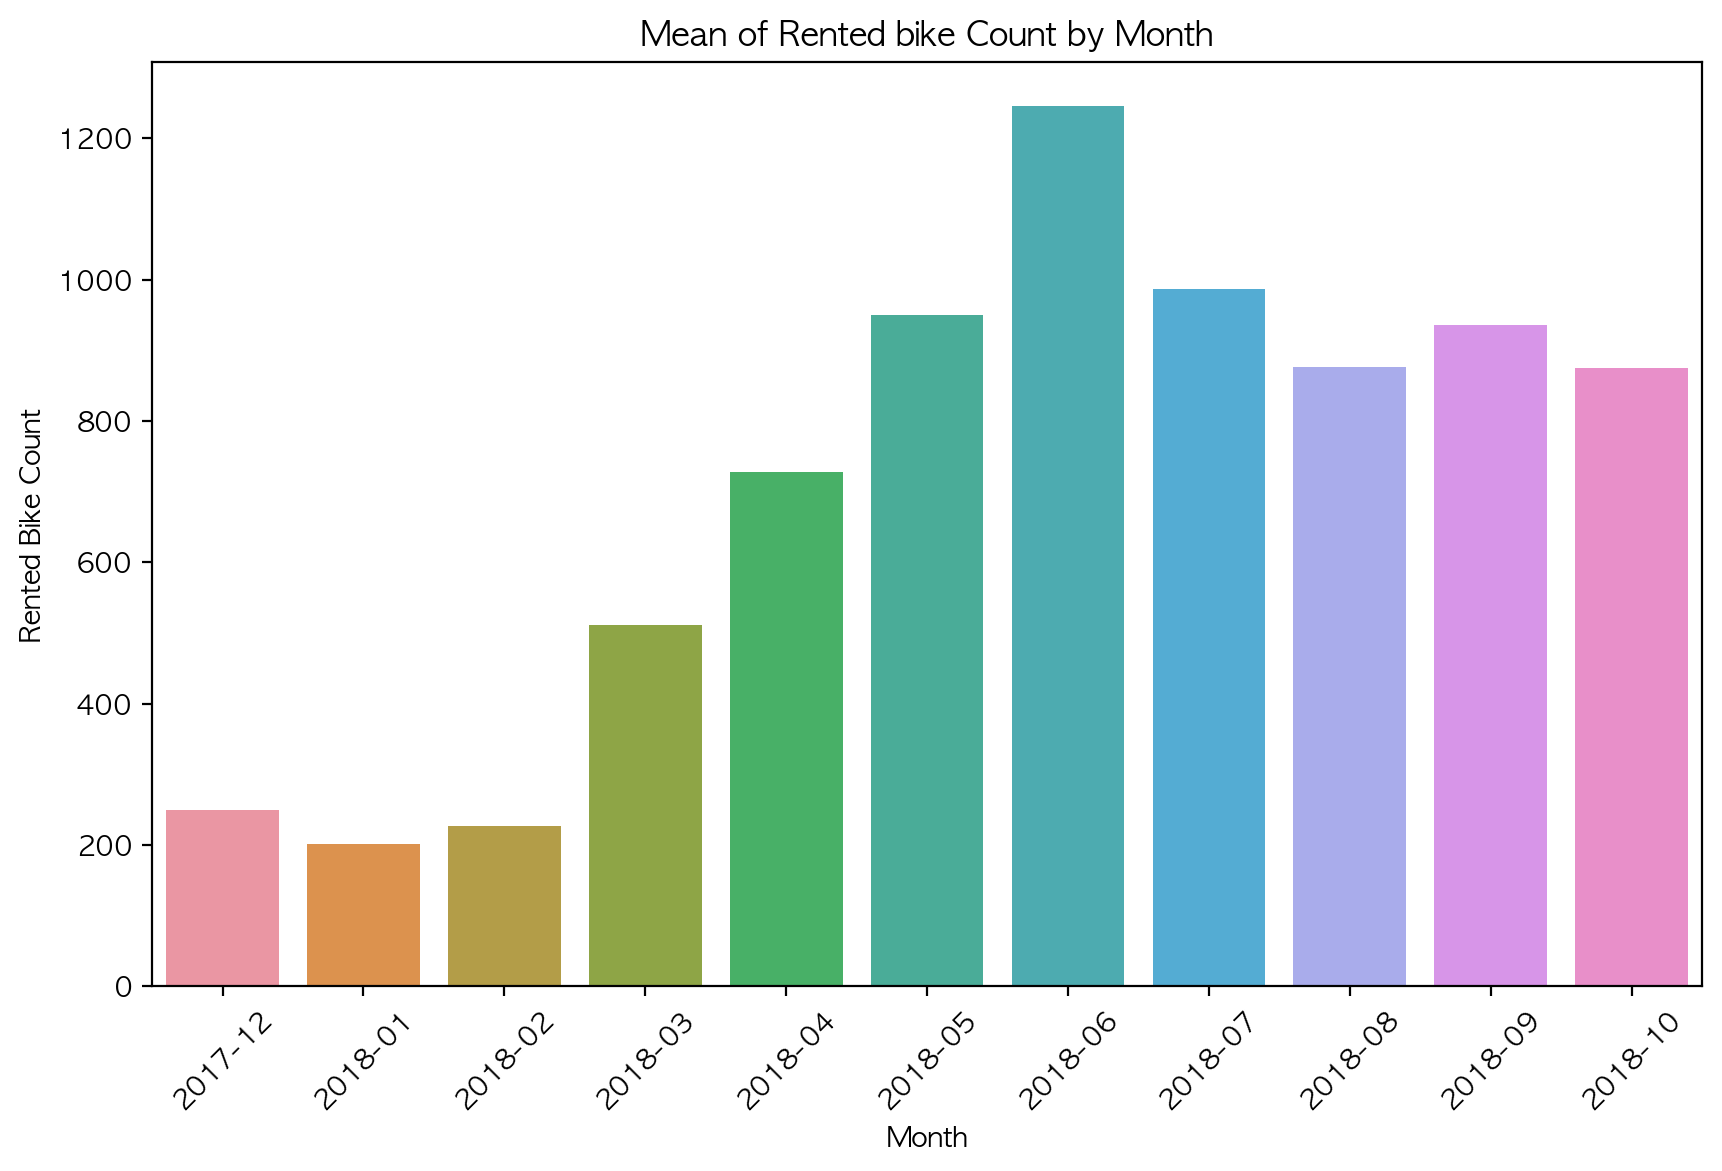

In [321]:
# 월별로 대여횟수의 정보 보기
# Date 열을 월 정보로 변환
data3['Month'] = data3['Date'].dt.to_period('M')

# 월별 자전거 대여 횟수 평균 계산
monthly_avg = data3.groupby('Month')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rented Bike Count', data=monthly_avg)
plt.title('Mean of Rented bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.show()


## 월별 데이터로, 대여량을 보면, 겨울에는 대여횟수가 매우 낮다, 점점 날씨가 풀리면서, 대여횟수가 늘어나고 있고, 추워지면서 줄어들고 있다.

## 시간대별로도 확인

In [322]:
# 시간대 확인, 0~23시 까지 있음
print(data3["Hour"].unique().min())
print(data3["Hour"].unique().max())

0
23


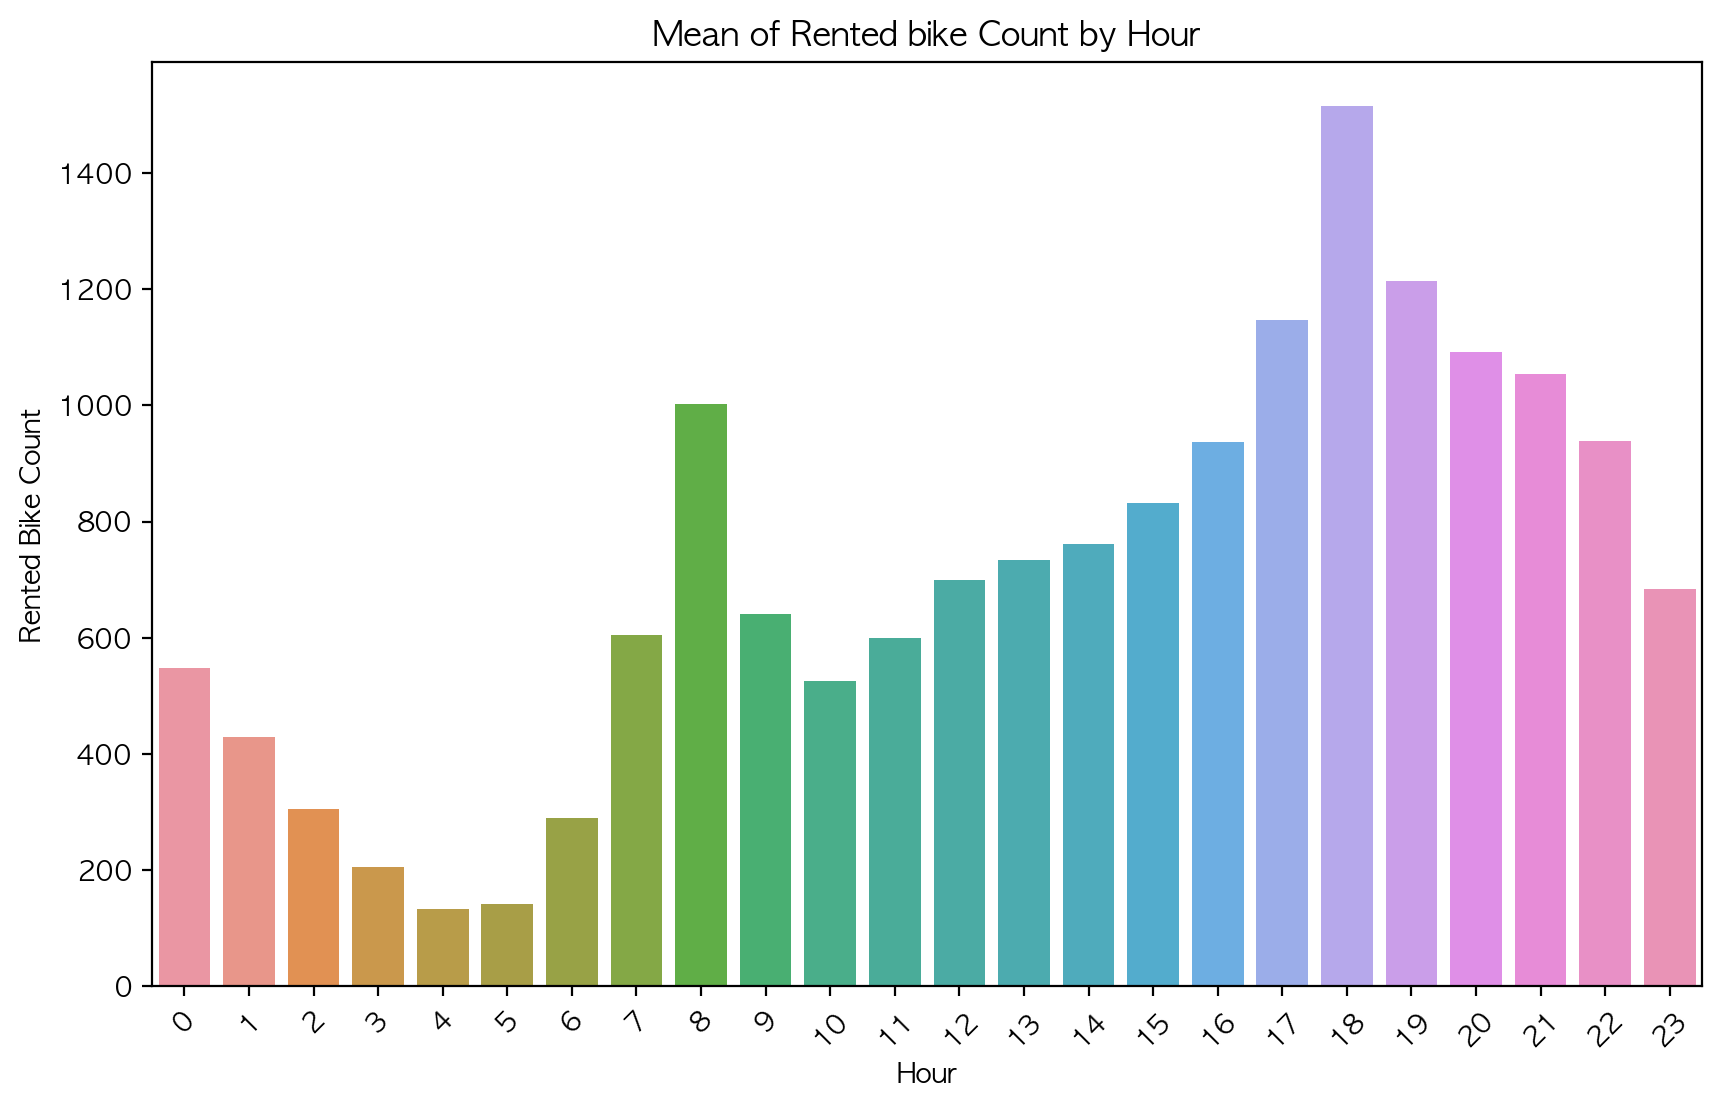

In [323]:
#시간에 따른 평균 대여횟수 확인
#시간대별 자전거 대여 횟수 평균 계산
hour_avg = data3.groupby('Hour')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=hour_avg)
plt.title('Mean of Rented bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.show()


## 새벽 시간대에는 대여 횟수가 점점 줄어들면서, 시간이 갈수록 늘어난다, 출근시간 및 퇴근시간에 가장 대여횟수가 많다

### 월별 기온정보도 한번 확인해 보자 ( 그냥)

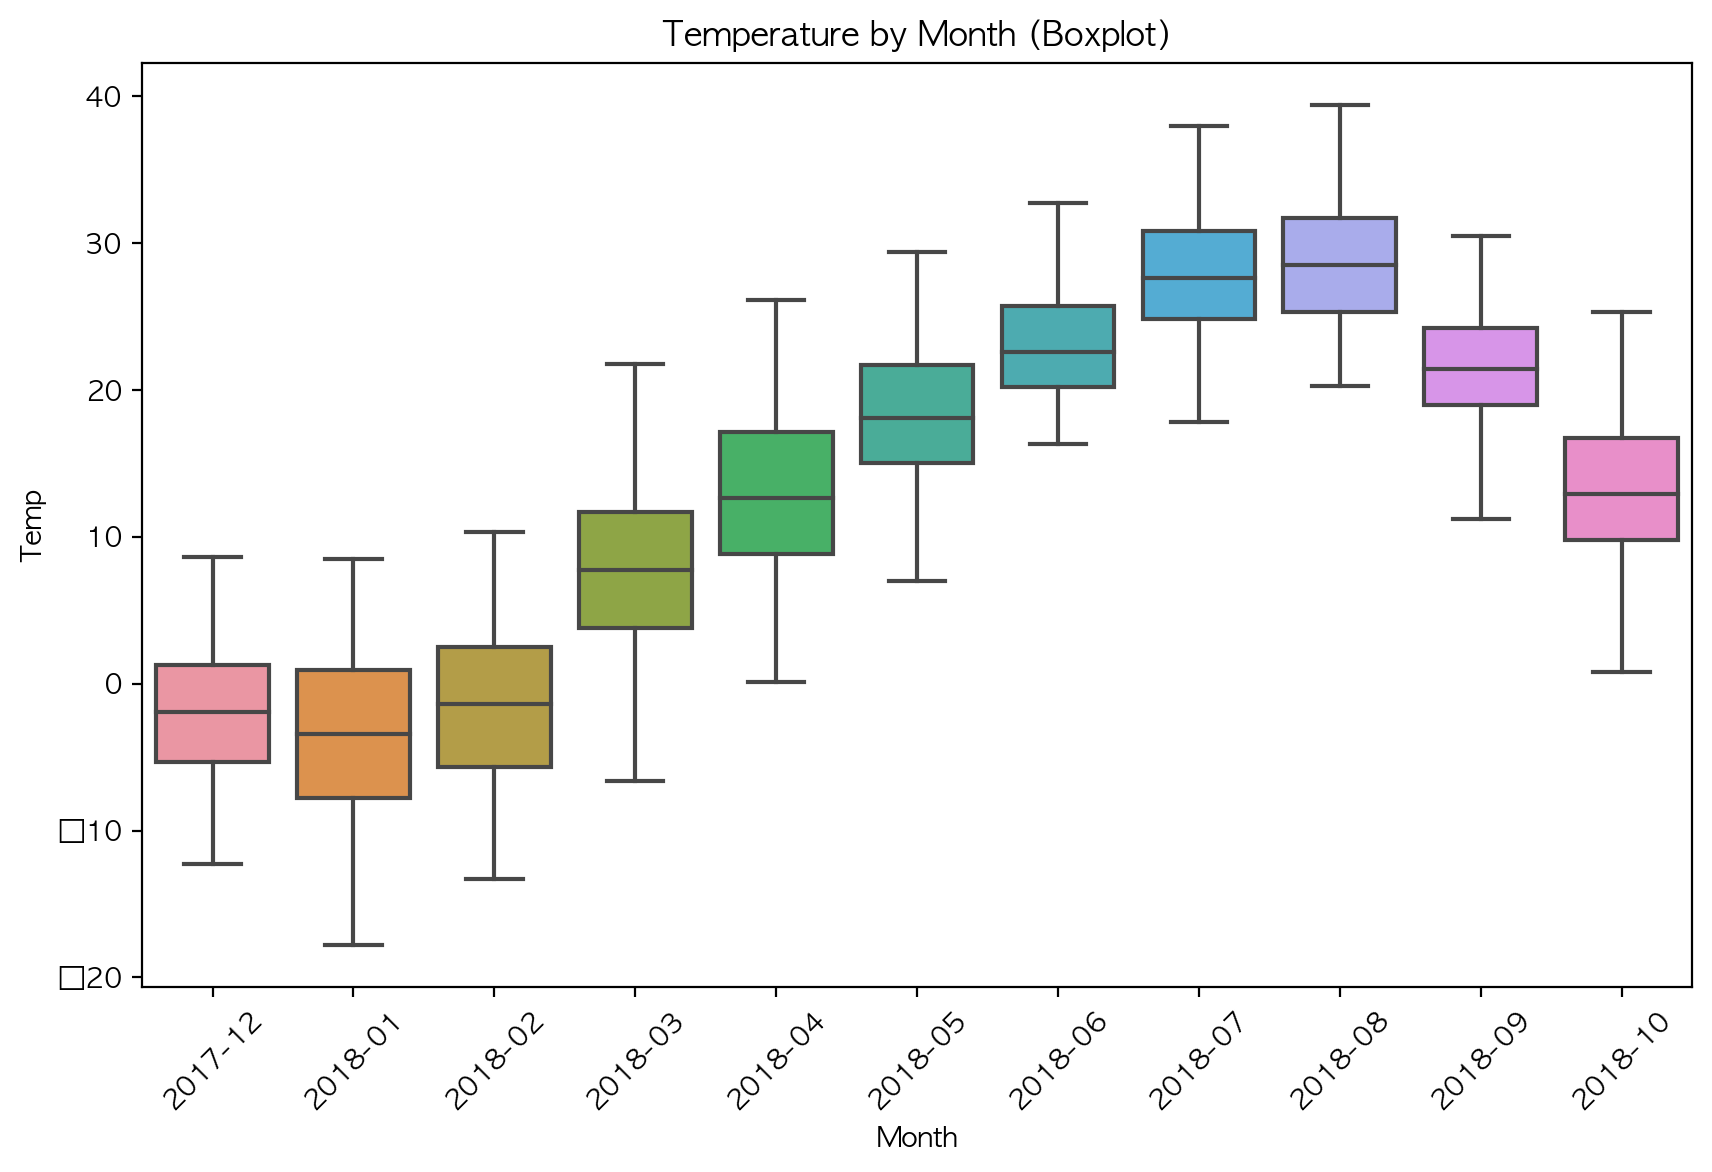

In [324]:
# 월별 기온 정보 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature(°C)', data=data3)
plt.title('Temperature by Month (Boxplot)')
plt.xlabel('Month')
plt.ylabel('Temp')
plt.xticks(rotation=45)
plt.show()


# 온도에 따른 대여횟수 (산점도)

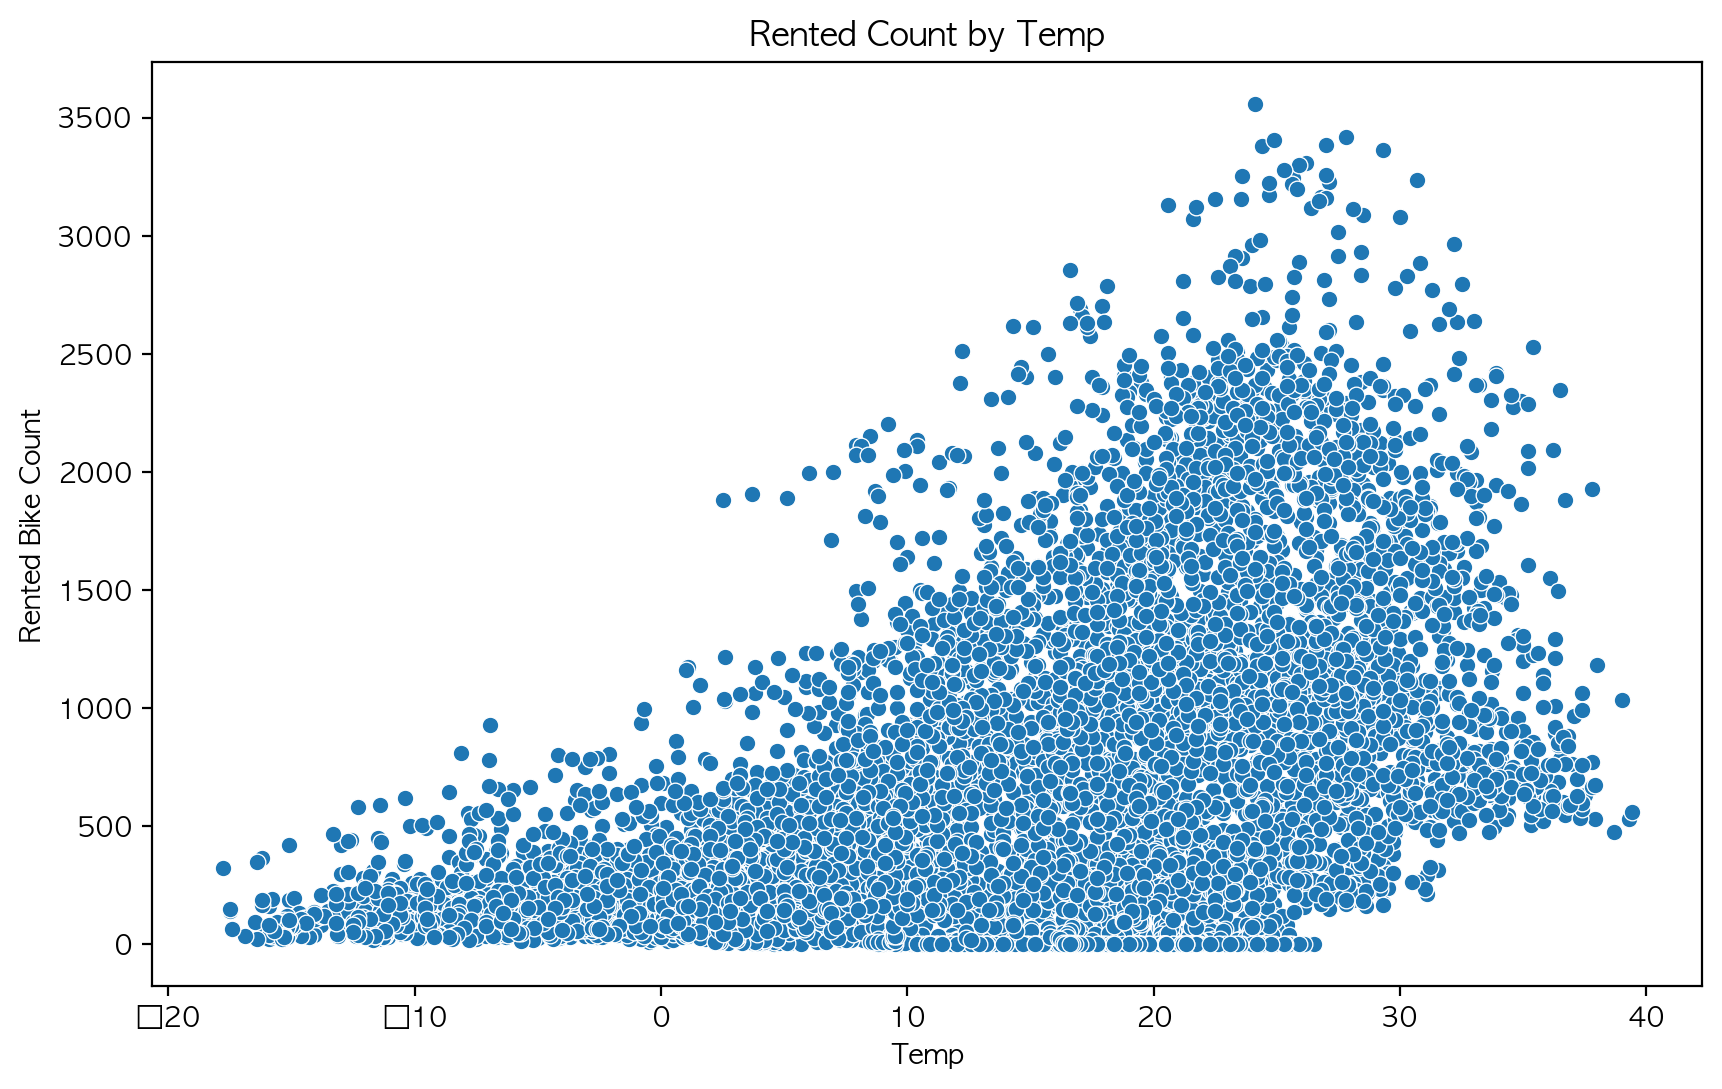

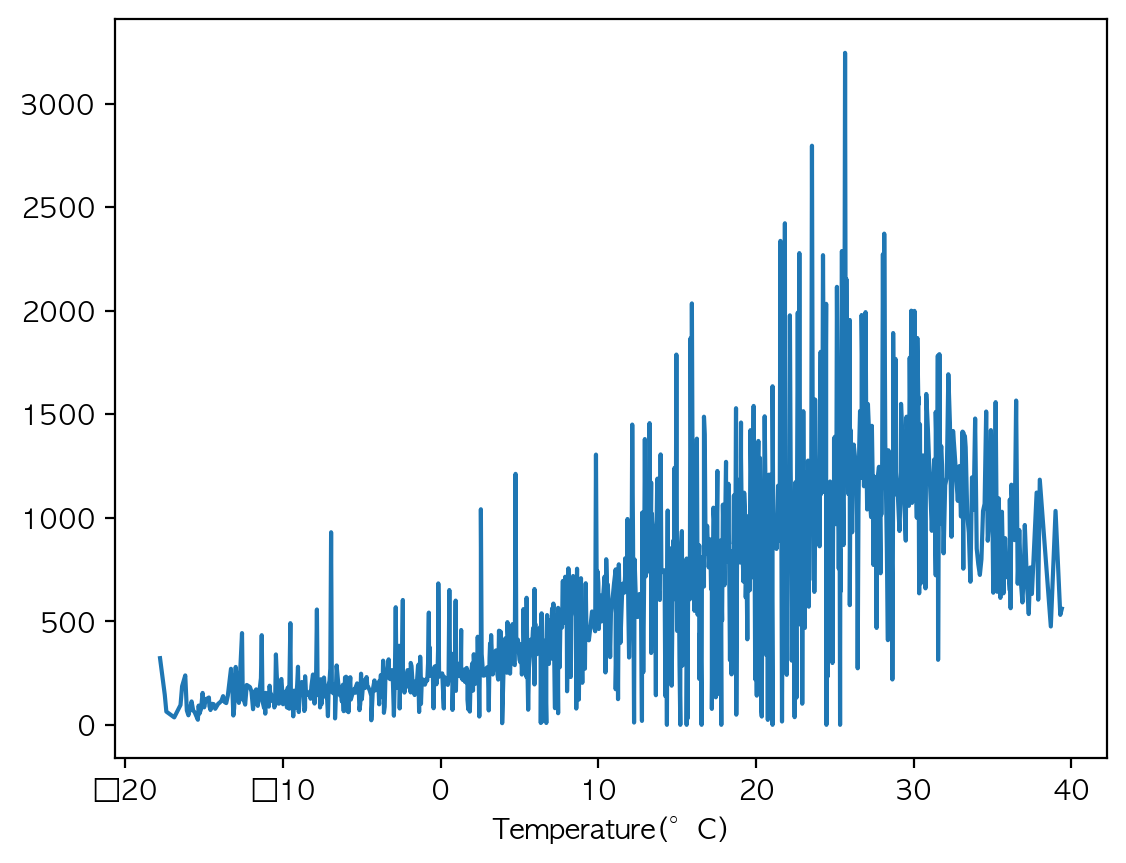

In [325]:
#온도에 따른 대여횟수
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data3)
plt.title('Rented Count by Temp')
plt.xlabel('Temp')
plt.ylabel('Rented Bike Count')
plt.show()

#온도에 따른 평균 대여횟수
pd.pivot_table(data3,'Rented Bike Count',index=['Temperature(°C)'])

data_temp=data3.groupby(['Temperature(°C)'])['Rented Bike Count'].mean()

data_temp.plot()
plt.show()


# 습도에 따른 대여횟수

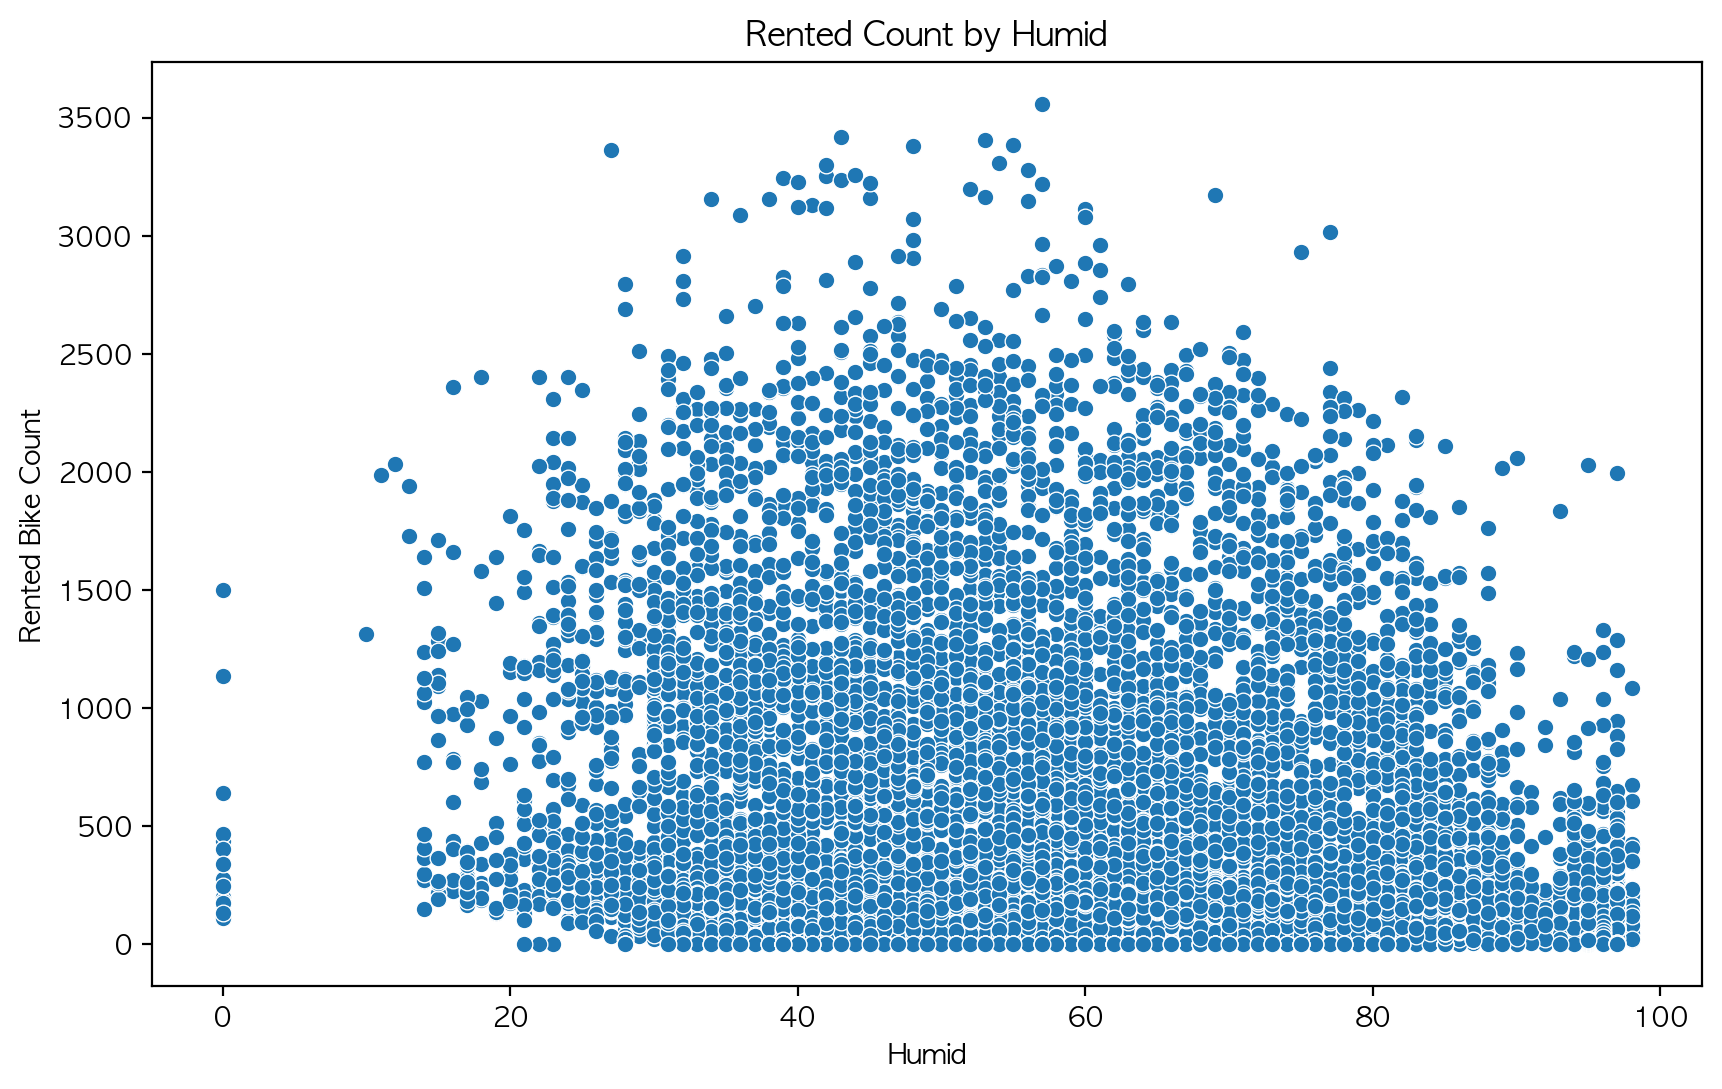

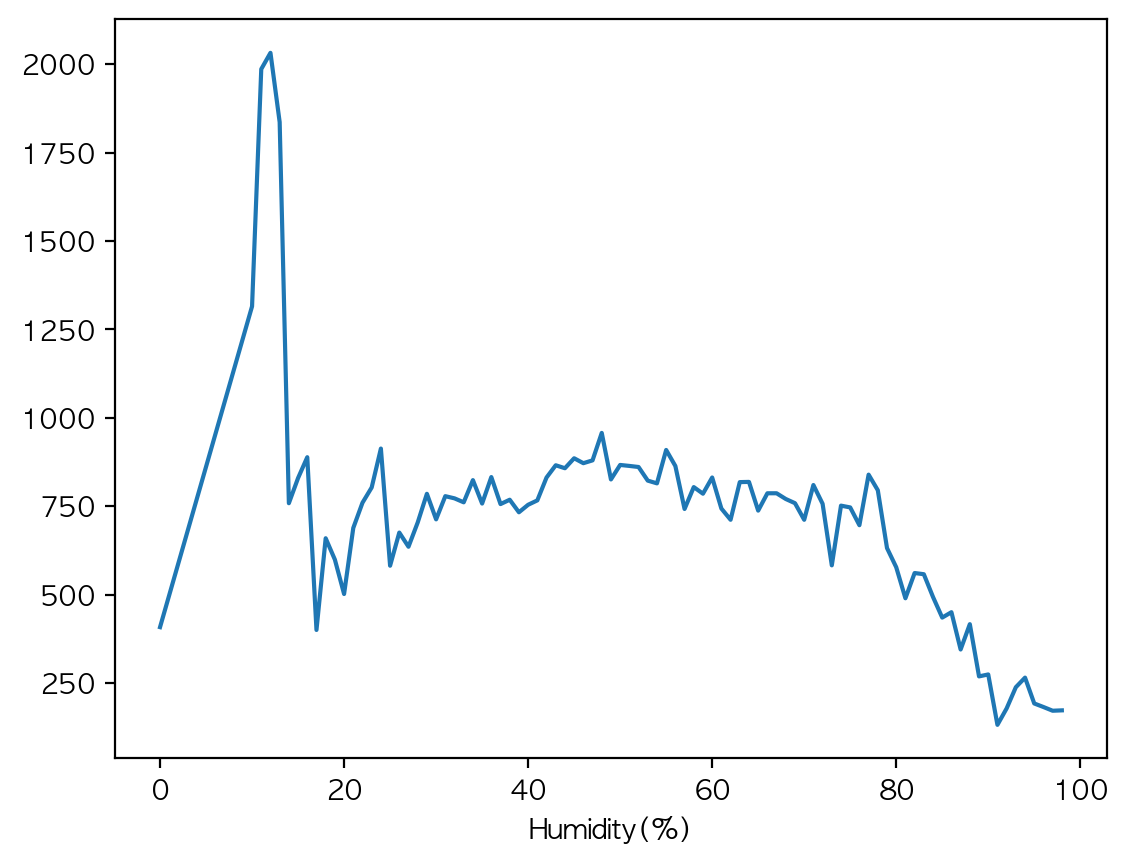

In [326]:
#습도에 따른 대여횟수
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=data3)
plt.title('Rented Count by Humid')
plt.xlabel('Humid')
plt.ylabel('Rented Bike Count')
plt.show()

#습도에 따른 평균 대여횟수
pd.pivot_table(data3,'Rented Bike Count',index=['Humidity(%)'])

data_Humid=data3.groupby(['Humidity(%)'])['Rented Bike Count'].mean()

data_Humid.plot()
plt.show()


In [327]:
data3.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12


# 풍속, 가시성, 이슬점을 묶어서 확인해보기

In [328]:
#Dew point temperature(°C) = 이슬점
#풍속(Wind speed (m/s)), 가시성(Visibility (10m)), 이슬점 (Dew point temperature(°C)) 데이터 보기
print('풍속',data3['Wind speed (m/s)'].unique())
print('가시성',data3['Visibility (10m)'].unique())
print('이슬점',data3['Dew point temperature(°C)'].unique())

풍속 [2.2        0.8        1.         0.9        1.72522255 1.5
 1.3        1.1        0.5        1.2        1.4        1.6
 2.         3.2        1.7        0.6        2.1        2.5
 1.8        2.3        2.6        1.9        2.7        3.7
 3.4        3.5        4.2        4.5        4.1        4.8
 5.8        5.3        3.         2.8        0.         3.1
 2.9        0.7        0.4        2.4        3.3        0.3
 4.3        4.         3.9        4.7        3.8        3.6
 5.1        4.6        0.1        5.         4.4        4.9
 0.2        1.89062027 6.7        6.         5.2        2.20016835
 5.6        1.92481315 1.96251897 7.4        7.2        6.1
 7.3        5.4        1.71703704 1.69281346 1.45358209 1.7002963
 6.9        1.5668693  1.53513097 5.7       ]
가시성 [2000 1928 1996 ... 1036  772  854]
이슬점 [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4  -4.2  -4.9  -6.2  -6.9
  -7.1  -7.3  -7.9  -7.8  -7

In [329]:
print('최저 풍속 : ' , data3['Wind speed (m/s)'].min())
print('최고 풍속 : ' , data3['Wind speed (m/s)'].max())
print('최저 가시성 : ' , data3['Visibility (10m)'].min())
print('최고 가시성 : ' , data3['Visibility (10m)'].max())
print('최저 이슬점 : ' , data3['Dew point temperature(°C)'].min())
print('최고 이슬점 : ' , data3['Dew point temperature(°C)'].max())

최저 풍속 :  0.0
최고 풍속 :  7.4
최저 가시성 :  27
최고 가시성 :  2000
최저 이슬점 :  -30.6
최고 이슬점 :  27.2


## 풍속, 가시성, 이슬점 을 계절별로 보기

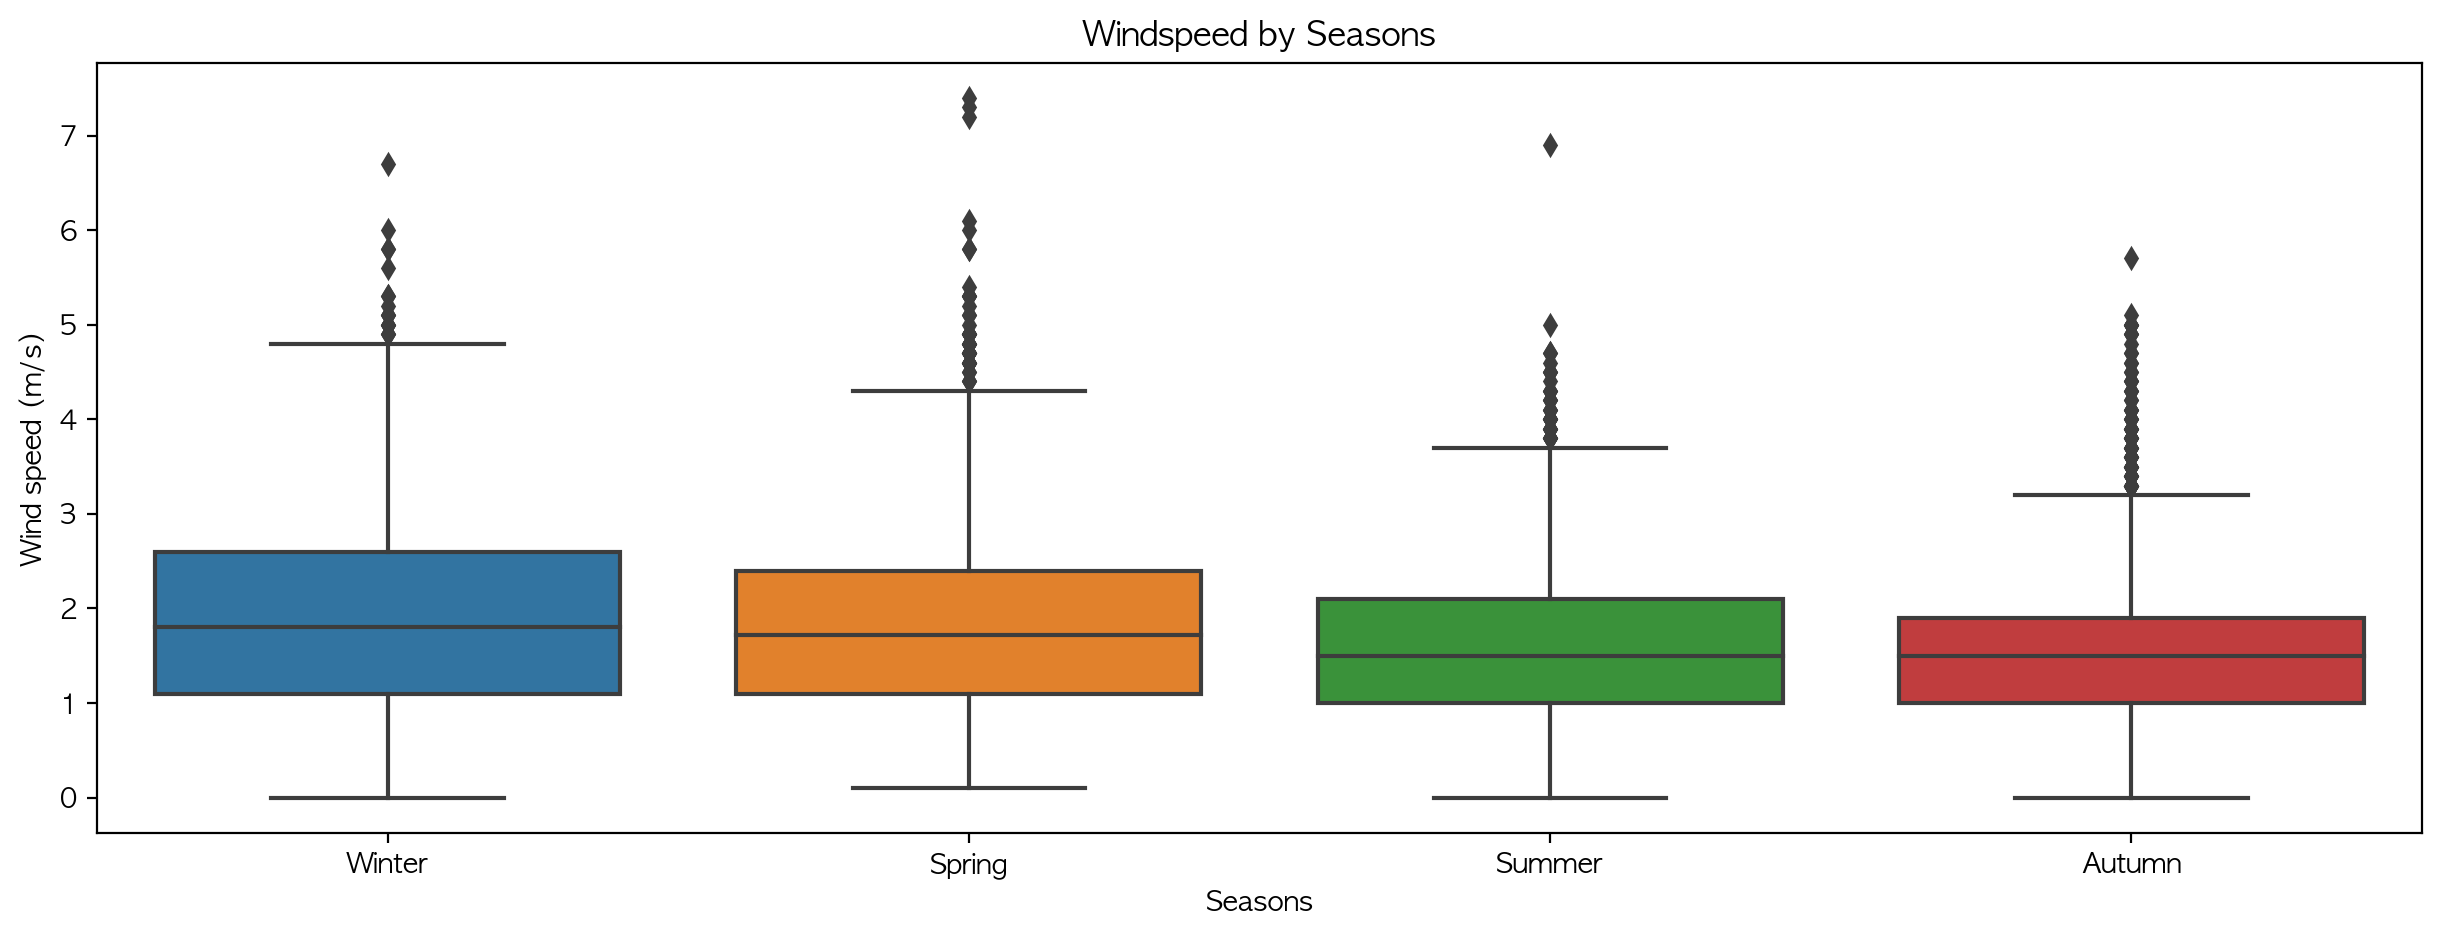

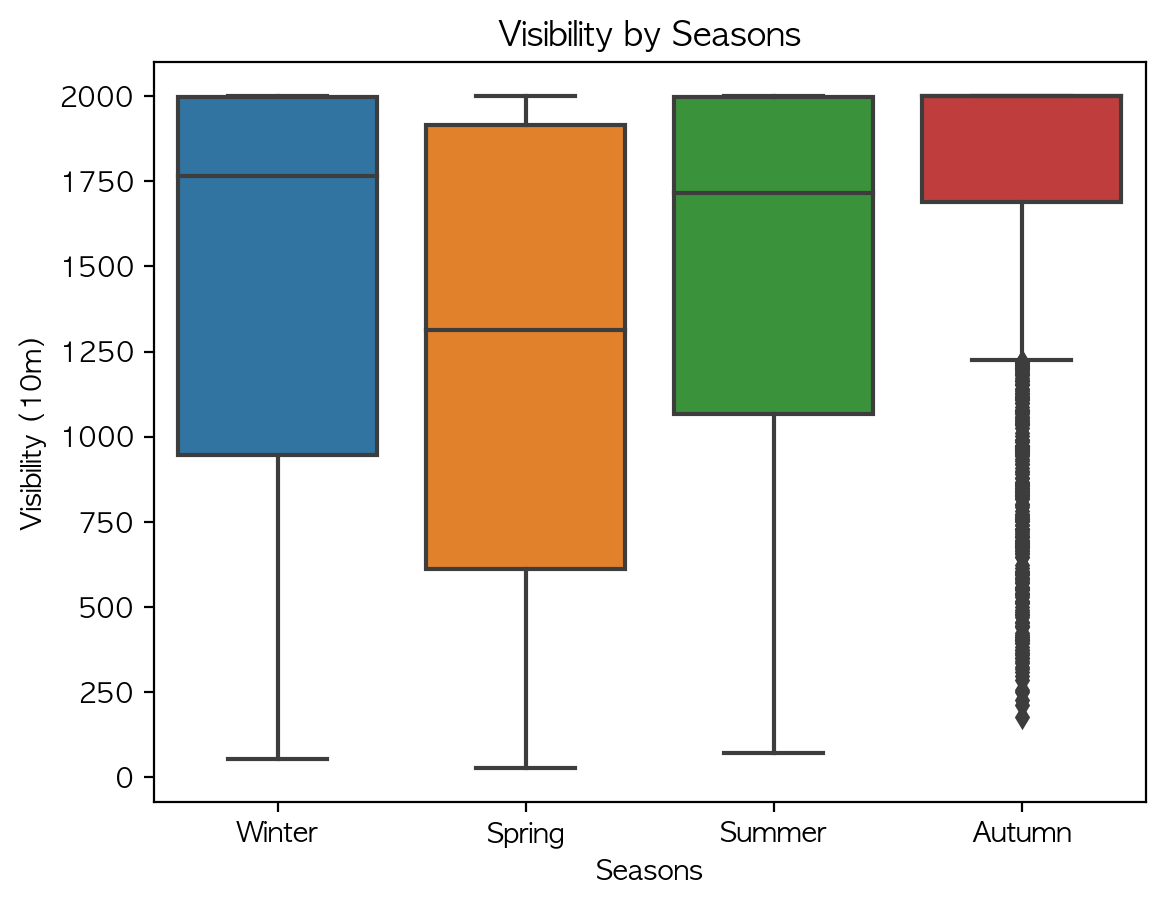

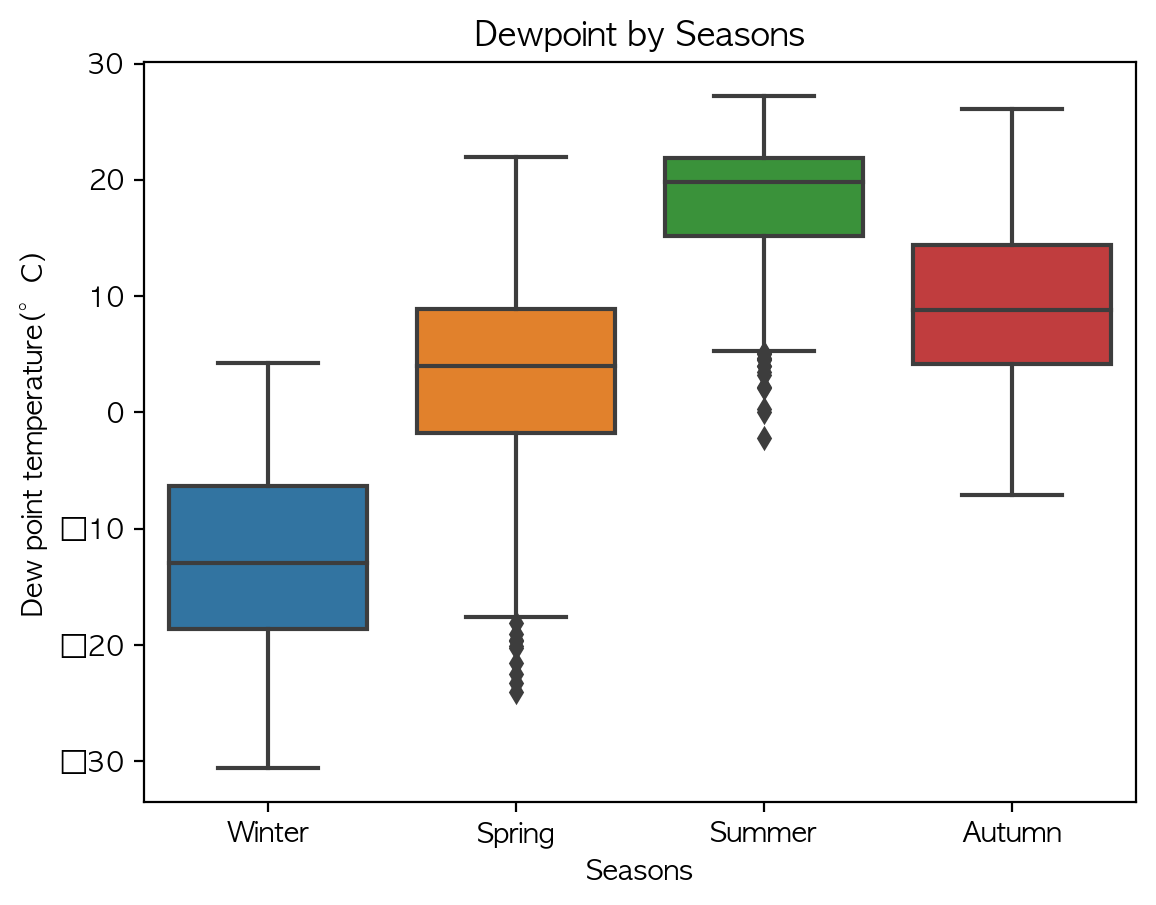

In [330]:
#계절별로 풍속, 가시성, 이슬점 관계 보기

plt.figure(figsize=(15, 5))

# 계절별 풍속 boxplot
sns.boxplot(x='Seasons', y='Wind speed (m/s)', data=data3)
plt.title('Windspeed by Seasons')
plt.show()
# 계절별 가시성 boxplot
sns.boxplot(x='Seasons', y='Visibility (10m)', data=data3)
plt.title('Visibility by Seasons')
plt.show()
# 계절별 이슬점 boxplot
sns.boxplot(x='Seasons', y='Dew point temperature(°C)', data=data3)
plt.title('Dewpoint by Seasons')
plt.show()

# 풍속은 겨울 -> 봄 -> 여름 -> 가을 순이고 
# 가시성은 봄이 가시성이 낮다
# 이슬점은 겨울에 가장 낮으며, 여름에 가장 높다. 이는 이슬점의 원리 때문이고, 강수량, 강설량에도 영향이 있을 것 같다.

In [331]:
data3.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12


# 태양복사에너지, 강수량, 강설량 확인

In [332]:
# Solar Radiation (MJ/m2) = 태양 복사 에너지 
# Rainfall(mm) = 강수량
# Snowfall (cm) = 강설량
print('최저 태복에 : ' , data3['Solar Radiation (MJ/m2)'].min())
print('최고 태복에 : ' , data3['Solar Radiation (MJ/m2)'].max())
print('태양 복사 에너지',data3['Solar Radiation (MJ/m2)'].unique())
print('최저 강수량 : ' , data3['Rainfall(mm)'].min())
print('최고 강수량 : ' , data3['Rainfall(mm)'].max())
print('강수량',data3['Rainfall(mm)'].unique())
print('최저 강설량 : ' , data3['Snowfall (cm)'].min())
print('최고 강설량 : ' , data3['Snowfall (cm)'].max())
print('강설량',data3['Snowfall (cm)'].unique())

최저 태복에 :  0.0
최고 태복에 :  3.52
태양 복사 에너지 [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06 0.02 0.25 0.43 0.6  0.69 0.53 0.2  0.05
 0.64 1.17 0.88 0.55 0.18 0.21 0.63 0.93 1.08 1.1  0.96 0.72 0.36 0.1
 0.14 0.41 0.98 1.14 1.04 0.84 0.51 0.15 1.22 0.87 0.56 0.61 0.89 1.05
 1.13 1.06 0.4  0.03 0.28 0.35 0.62 1.26 1.24 0.92 0.58 0.19 1.23 0.13
 0.52 0.48 0.09 0.34 0.42 0.32 0.86 1.07 0.17 0.85 0.47 0.57 0.91 0.71
 0.12 0.67 0.77 0.78 0.16 0.66 0.38 0.11 0.04 0.07 1.18 0.9  0.33 0.75
 0.59 0.29 0.81 0.83 0.39 1.15 1.03 0.95 0.76 1.02 0.26 0.5  0.27 0.73
 0.46 0.31 1.2  1.19 0.45 0.49 0.79 0.44 0.68 1.27 1.25 1.21 0.7  1.28
 1.3  1.29 0.82 1.65 2.04 2.25 2.18 1.91 1.42 1.57 1.99 2.22 2.17 1.89
 1.4  1.73 2.12 2.29 2.23 1.94 1.44 1.72 2.09 2.3  2.24 1.93 1.56 1.97
 2.02 1.87 1.41 1.54 1.9  2.11 1.81 1.37 1.66 1.49 1.75 2.35 1.36 1.43
 2.08 1.55 2.28 2.19 1.96 1.34 1.68 1.84 1.45 1.7  2.01 2.2  1.33 2.46
 2.39 1.63 1.98 1.77 1.38 1.71 2.03 2.21 

In [333]:
data_rain = data3.groupby('Rainfall(mm)')['Rented Bike Count'].mean()

In [334]:
data_snow = data3.groupby('Snowfall (cm)')['Rented Bike Count'].mean()

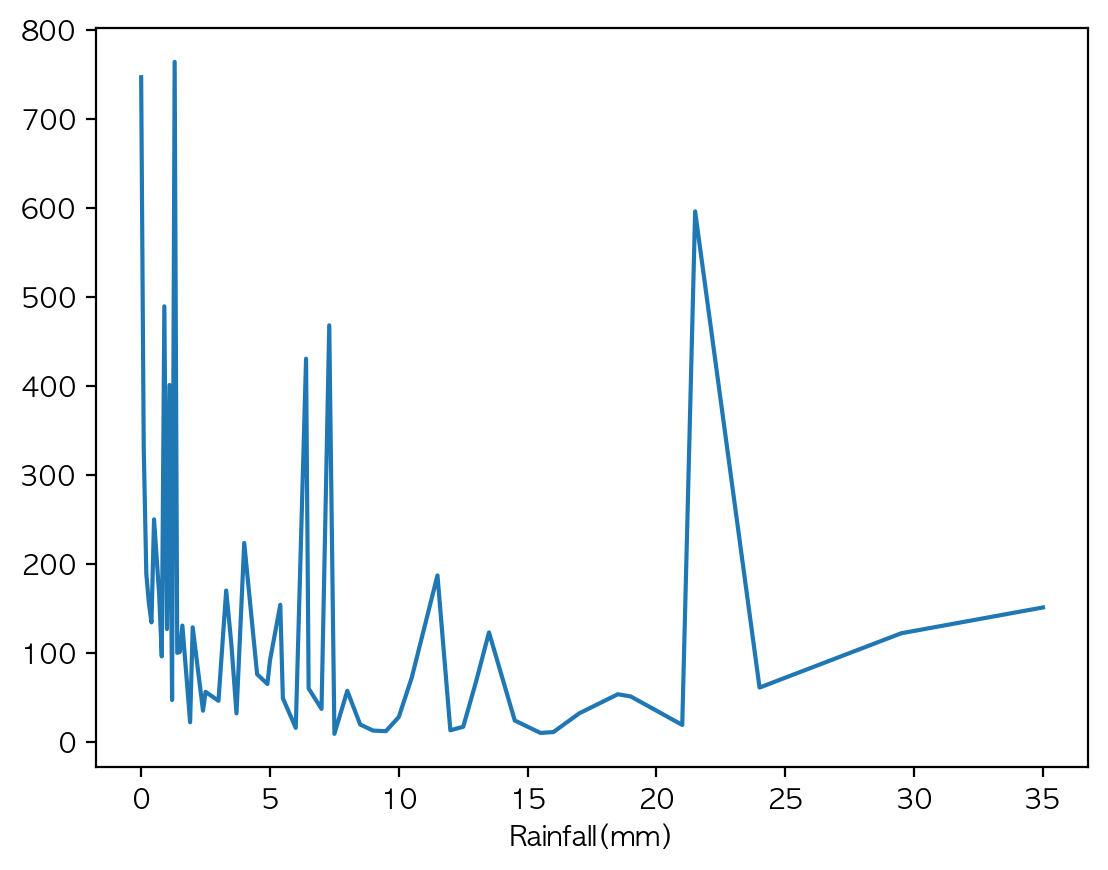

<Axes: xlabel='Snowfall (cm)'>

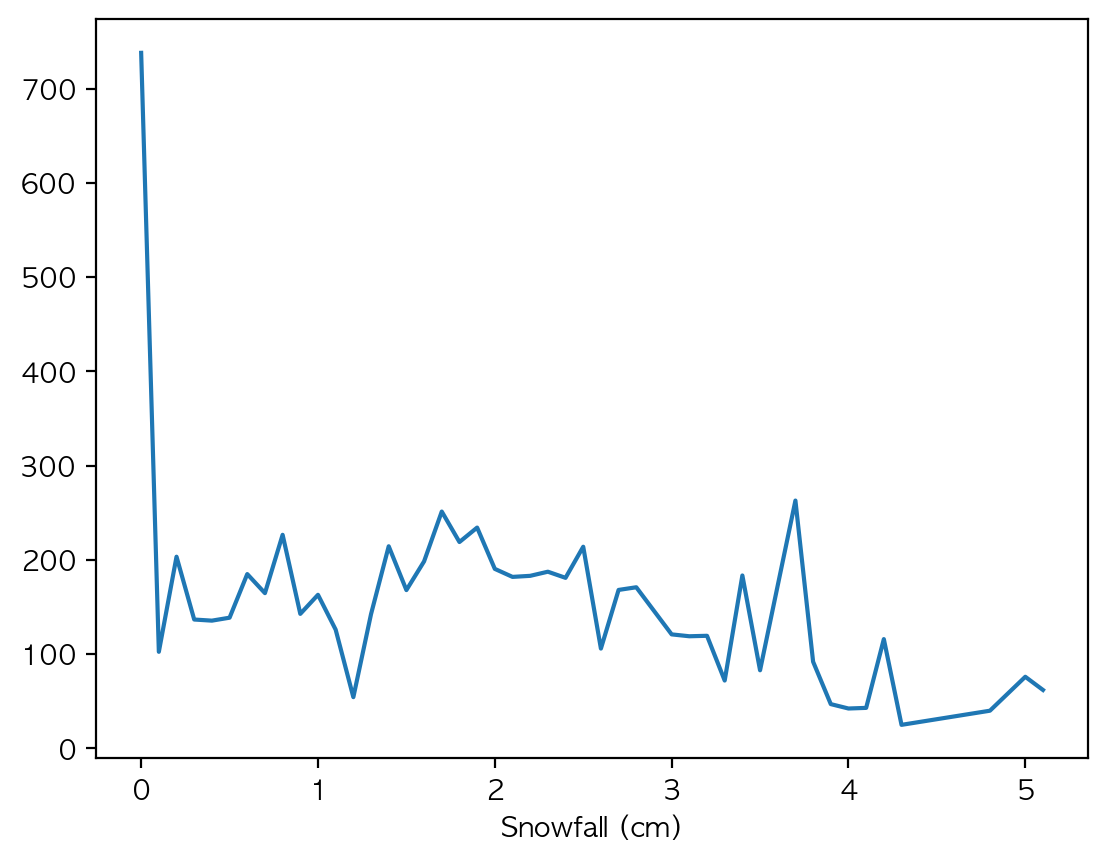

In [335]:
#강우,강설량 별 대여횟수 확인하기
data_rain.plot()
plt.show()
data_snow.plot()

## 그래프 확인 결과, 강우량 20 ~ 25와 강설량 4~8 사이 대여횟수가 생각보다 높음 -> 한번 뽑아보고 생각해보기

In [336]:
# 강우량이 20~25 사이에서는 대여횟수가 갑자기 높아짐 이상함
r = data3[(data3['Rainfall(mm)'] > 20) & (data3['Rainfall(mm)'] < 25)]

k
# 6월 28일 대여횟수가 유난히 높음 그 당시 예보를 확인해보니, 소나기 등의 관계가 있을듯

NameError: name 'k' is not defined

In [337]:
#마찬가지로, snowfall 열 또한 꾸준히 감소할 것으로 예상했지만, 6 부근에서 좀 높음 홧인해보기
s = data3[(data3['Snowfall (cm)'] > 4) & (data3['Snowfall (cm)'] < 8)]
s
# 2018년 11월 24일 (주말)값들이 점점 대여횟수가 증가하는 것을 볼 수 있는데,  -> 주말 평일 차이 보기
# 9시 데이터를 보면 강우량이 9.1로 높고 대여횟수 또한 적다
# 하지만, 이후 9~12시사이 강우량이 줄고 눈도 내리다가 점점 줄어들면서,
# 대여횟수가 증가하는 것을 볼 수 있었다. ( 눈은 대여횟수에 크게 영향을 미치지 않는가? 의문 )

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
224,2017-12-10,35,8,-0.200000,90,1.200000,378,-1.6,0.00,0.0,4.1,Winter,No Holiday,Yes,2017-12
225,2017-12-10,31,9,0.200000,90,1.000000,305,-1.2,0.00,1.6,4.3,Winter,No Holiday,Yes,2017-12
226,2017-12-10,19,10,0.500000,91,0.400000,143,-0.8,0.00,0.0,4.3,Winter,No Holiday,Yes,2017-12
418,2017-12-18,36,10,-3.700000,87,1.000000,541,-5.5,0.03,0.0,4.8,Winter,No Holiday,Yes,2017-12
419,2017-12-18,44,11,-2.966667,85,1.725223,243,-5.0,0.06,0.0,4.8,Winter,No Holiday,Yes,2017-12
420,2017-12-18,62,12,-1.366667,83,1.200000,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,Yes,2017-12
421,2017-12-18,76,13,-0.900000,84,1.200000,333,-3.2,0.09,0.0,5.0,Winter,No Holiday,Yes,2017-12
422,2017-12-18,116,14,0.500000,76,0.900000,364,-3.2,0.17,0.0,4.2,Winter,No Holiday,Yes,2017-12
2018,2018-02-23,62,2,0.700000,97,1.400000,197,0.2,0.00,0.0,4.1,Winter,No Holiday,Yes,2018-02
2019,2018-02-23,32,3,0.900000,97,1.200000,243,0.4,0.00,3.7,4.1,Winter,No Holiday,Yes,2018-02


# 주말과, 평일의 대여횟수 차이가 있는지 확인 -> 결과가 평일이 더 높게나옴 -> 이전에 시간데이터에서 출퇴근시간대에 값이 높았기 때문에, 따릉이 대여는 주말보다는 출퇴근 시간대에 영향을 더 많이 받을 거 같음

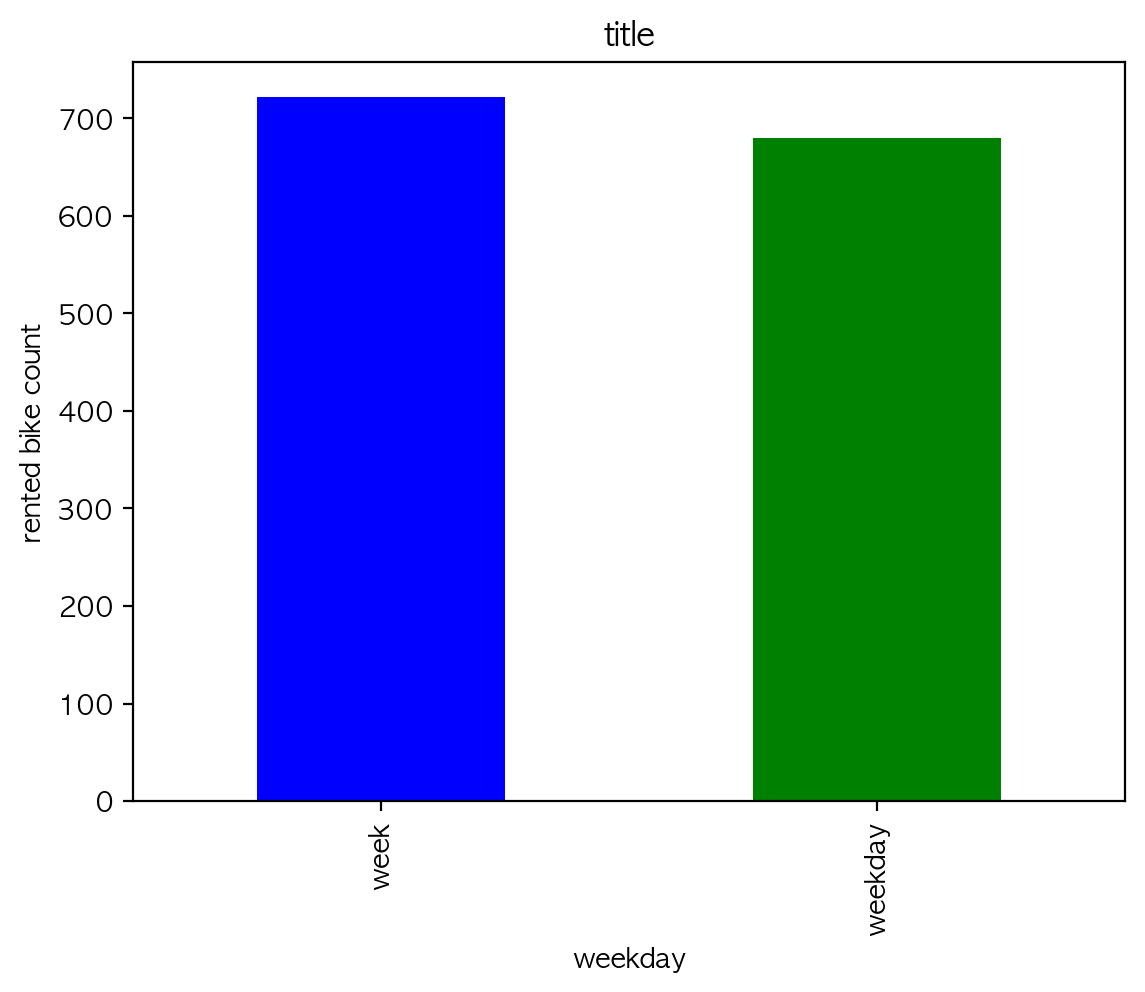

In [338]:
#평일 주말 대여횟수 차이 확인하기
# 요일 정보 추가
data3['weekday'] = data3['Date'].dt.day_name()

# 토요일과 일요일을 '토일'로, 나머지를 '월화수목금'으로 변경
data3['weekday'] = data3['weekday'].apply(lambda x: 'weekday' if x in ['Saturday', 'Sunday'] else 'week')

# '토일'과 '월화수목금' 별 대여횟수 평균 계산
average_rentals_by_day = data3.groupby('weekday')['Rented Bike Count'].mean()

average_rentals_by_day.plot(kind='bar', color=['blue', 'green'])

# 그래프 제목과 레이블 설정
plt.title('title')
plt.xlabel('weekday')
plt.ylabel('rented bike count')

# 그래프 출력
plt.show()
# 주말 대여량이 좀더 적음...

# 계절별 대여횟수 확인해보자

In [339]:
#계절별 대여횟수 총합 
data3.groupby('Seasons')['Rented Bike Count'].sum().sort_values()

Seasons
Winter     475059
Autumn    1375194
Spring    1555371
Summer    2300975
Name: Rented Bike Count, dtype: int64

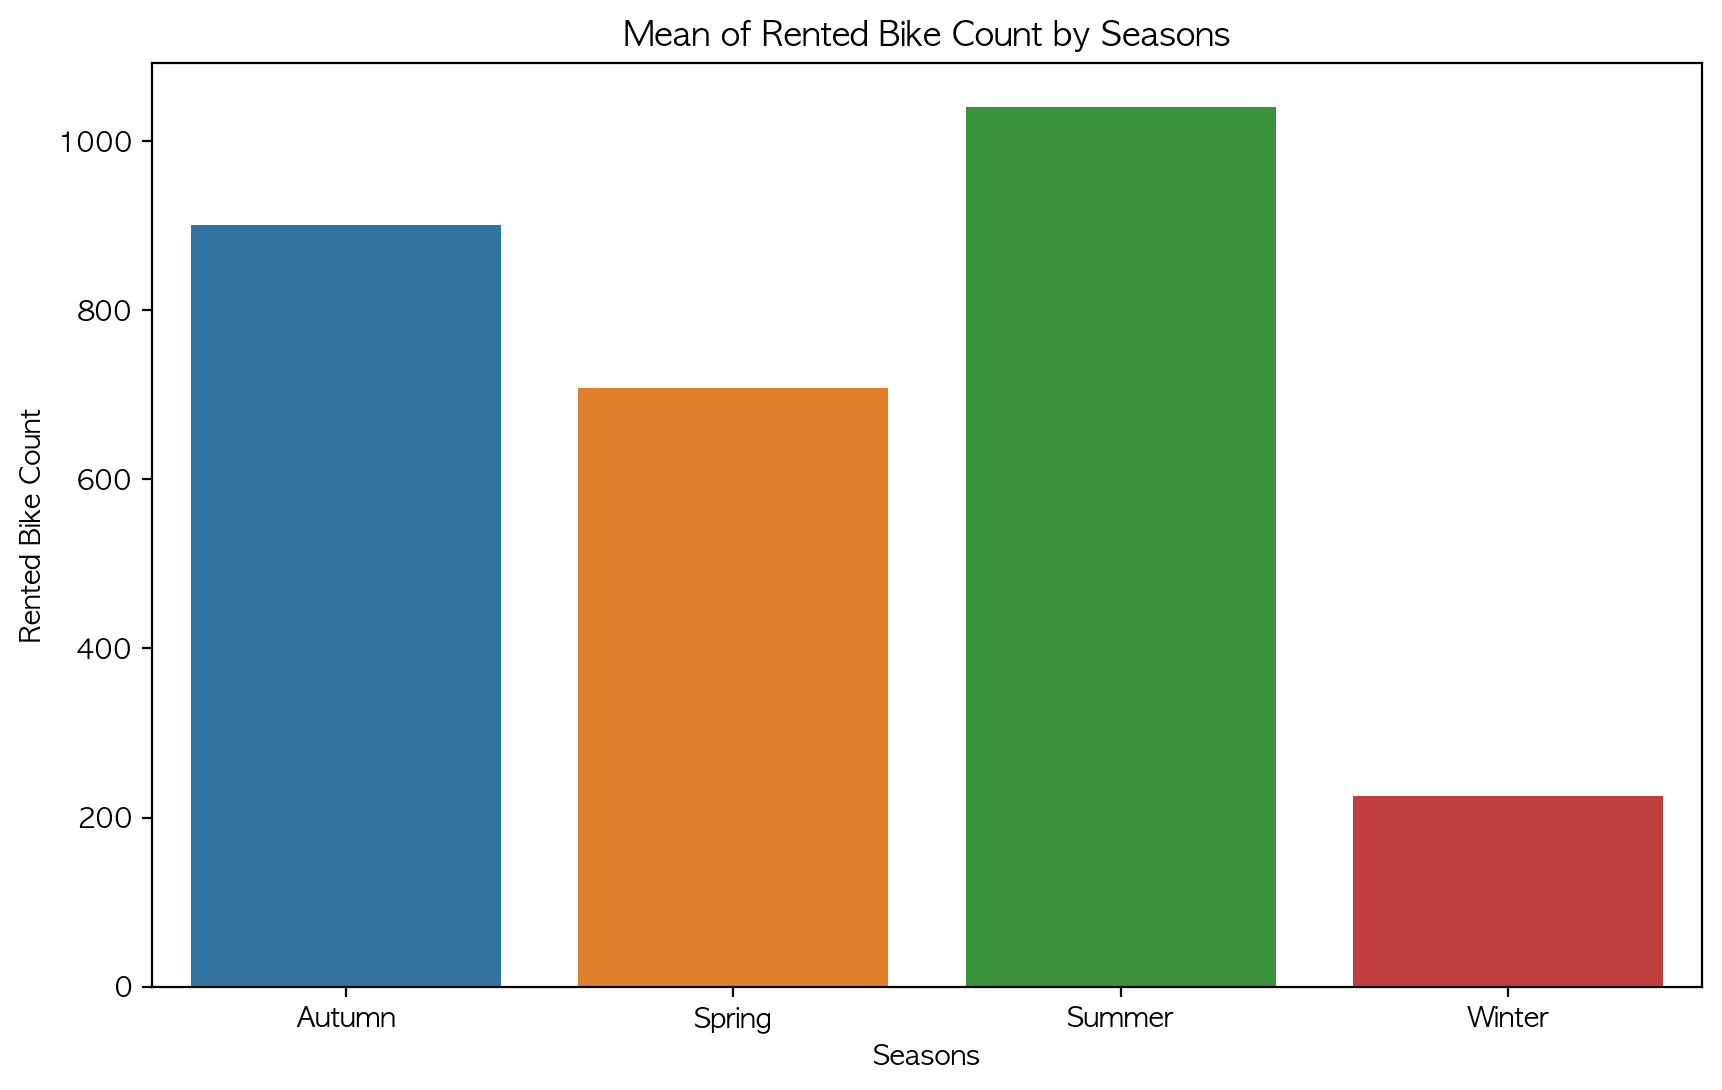

In [340]:
# 계절별 대여횟수 평균 계산
seasonal_avg = data3.groupby('Seasons')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=seasonal_avg)
plt.title('Mean of Rented Bike Count by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()

In [341]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(°C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(°C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    8040 non-null   object        
 12  Holida

# Holiday / Functioning Day

In [342]:
pd.crosstab(index=data3['Holiday'], columns='count')

col_0,count
Holiday,
Holiday,432
No Holiday,7608


In [343]:
pd.crosstab(index=data3['Functioning Day'], columns='count')

col_0,count
Functioning Day,
No,223
Yes,7817


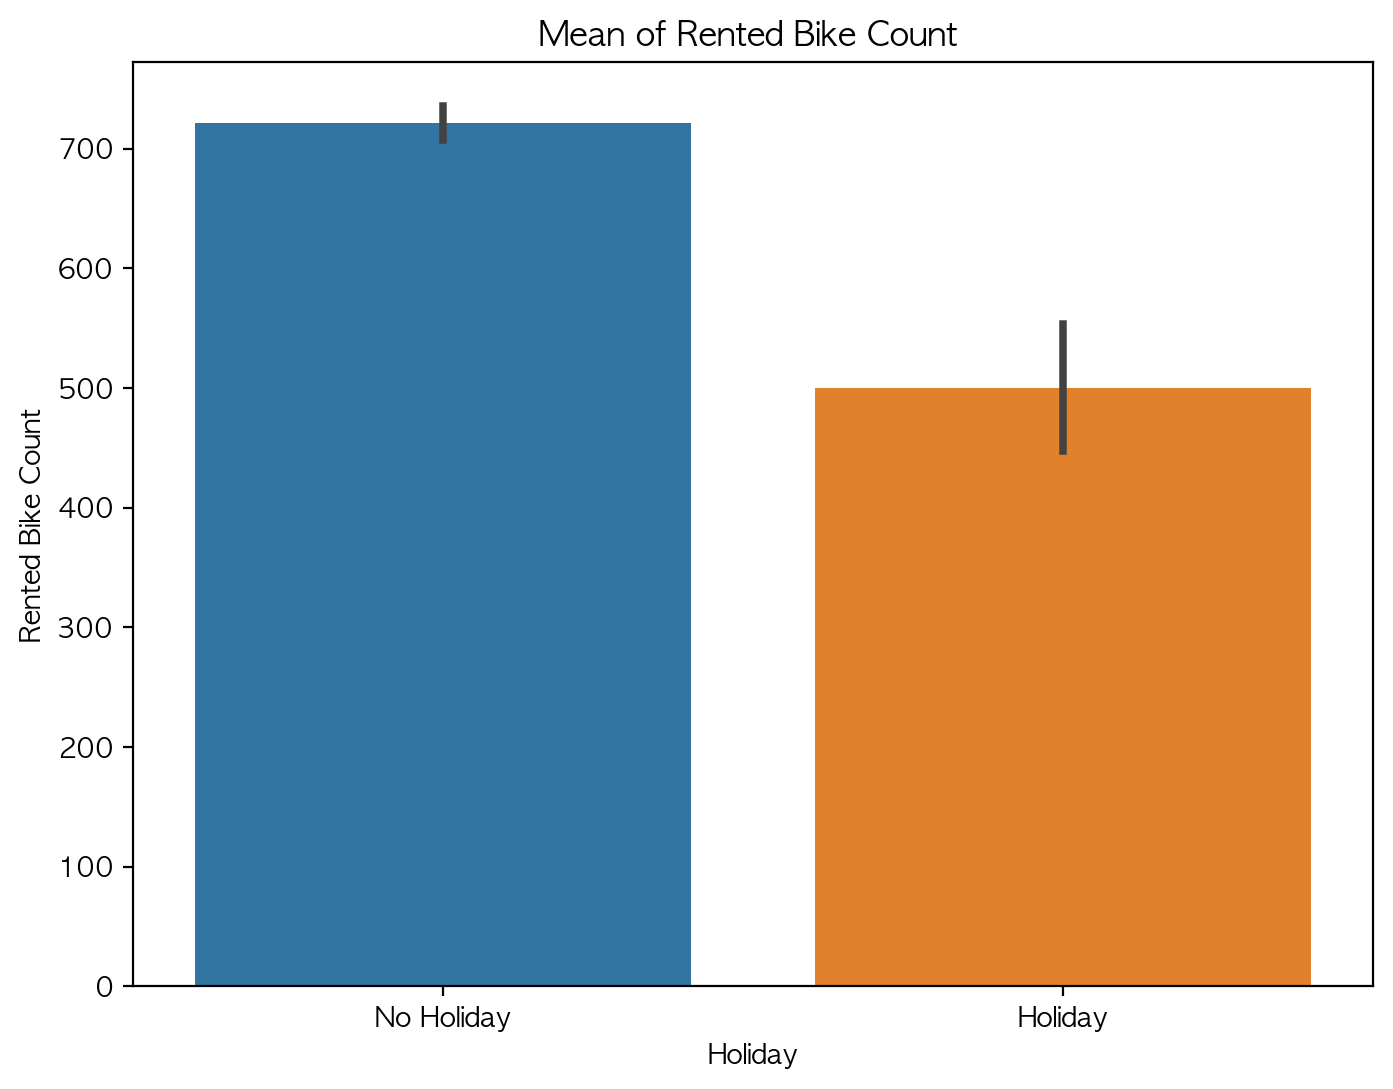

In [344]:
# 공휴일 여부에 따른 대여횟수 평균
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=data3)
plt.title('Mean of Rented Bike Count ')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

In [345]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(°C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(°C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    8040 non-null   object        
 12  Holida

# 모델링 전 전처리 (원-핫 인코딩 실시)
 ## 계절, 휴일, 작동여부 등이 필요함(object)
 ## 계절 -> get_dumimies 활용
 ## 휴일, 작동여부 -> map함수 활용하여 yes : 1 / no : 0 으로 지정

In [346]:
data3.Seasons.unique()
# 원핫인코딩으로 컴퓨터가 인지할 수 있도록 변경해주기

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [347]:
df = pd.get_dummies(data3['Seasons'], prefix='Season')

In [348]:
df = pd.concat([data3,df],axis=1)

In [349]:
df.drop('Seasons', axis=1, inplace=True)

In [350]:
df.head() #계절 변수 원핫인코딩 성공

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017-12,week,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017-12,week,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,2017-12,week,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017-12,week,0,0,0,1
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,2017-12,week,0,0,0,1


In [351]:
# holiday와 functioning day 원핫인코딩
df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [352]:
# 'Holiday' 열에 대한 원핫인코딩 
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# 결과 출력
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,0,Yes,2017-12,week,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,0,Yes,2017-12,week,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,0,Yes,2017-12,week,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,0,Yes,2017-12,week,0,0,0,1
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,0,Yes,2017-12,week,0,0,0,1


In [353]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [354]:
#Functioning Day 원핫인코딩 yes=1 no=0
df['Functioning Day']=df['Functioning Day'].map({'Yes' : 1, 'No' : 0})

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1


In [355]:
df['Functioning Day'].unique()

array([1, 0])

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(°C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(°C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Holiday                    8040 non-null   int64         
 12  Functi

In [357]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Functioning Day              0
Month                        0
weekday                      0
Season_Autumn                0
Season_Spring                0
Season_Summer                0
Season_Winter                0
dtype: int64

In [358]:
df1 = df.copy() 

In [359]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,0,1,2017-12,week,0,0,0,1


In [360]:
del df['Month']

In [361]:
del df['weekday']

In [362]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


# GBM( gradient boosting ) 
 ## 트리 모형을 기반으로 한 데이터 
 ## 경사하강법을 이용하여, 가중치를 업데이트하는 방법
 ## 결국 잔차를 0으로 만들기위해 계속해서 학습시키기 때문에 과적합 될 가능성이 높음 -> 그래서 나온 것이 XGB,lightGBM 등이 있음

 ### 변수 스케일링 불필요
  - GBM은 트리기반 모델로, 결정트리의 비선형성과 앙상블의 강건성 등의 이유로 스케일링에 민감하지 않음
  - 하이퍼파라미터 조정 ( 학습 시 조정 )

# test셋 

In [409]:
test = pd.read_csv('/Users/hongminhwa/Desktop/baf/test.csv')

In [410]:
test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [411]:
test = test.rename(columns={'Temperature(째C)': 'Temperature(°C)', 'Dew point temperature(째C)':'Dew point temperature(°C)'})

In [412]:
test.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [413]:
test.isna().sum()

Date                          0
Hour                          0
Temperature(°C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(°C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

In [414]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       720 non-null    object 
 1   Hour                       720 non-null    int64  
 2   Temperature(°C)            644 non-null    float64
 3   Humidity(%)                720 non-null    int64  
 4   Wind speed (m/s)           646 non-null    float64
 5   Visibility (10m)           720 non-null    int64  
 6   Dew point temperature(°C)  720 non-null    float64
 7   Solar Radiation (MJ/m2)    720 non-null    float64
 8   Rainfall(mm)               720 non-null    float64
 9   Snowfall (cm)              720 non-null    float64
 10  Seasons                    646 non-null    object 
 11  Holiday                    720 non-null    object 
 12  Functioning Day            720 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 7

In [415]:
# date변수 datetime 형식으로 변경
test['Date'] = pd.to_datetime(test['Date'], format='%d/%m/%Y')

# 날짜 데이터의 최솟값과 최댓값
min_date = test['Date'].min()
max_date = test['Date'].max()
# Date 열을 월 정보로 변환
test['Month'] = test['Date'].dt.to_period('M')


# test 온도 결측치 처리

In [416]:
# 전후 값의 평균으로 대체
test['Temperature(°C)'] = test['Temperature(°C)'].fillna((test['Temperature(°C)'].shift() + test['Temperature(°C)'].shift(-1)) / 2)

# 연속된 결측치 처리
window_size = 5
test['Temperature(°C)'] = test['Temperature(°C)'].fillna(test['Temperature(°C)'].rolling(window=window_size, min_periods=1, center=True).mean())
print(test['Temperature(°C)'].isna().sum()) #결측치 처리 완료

0


# test 풍속 결측치 처리

In [417]:
# 풍속 결측치 확인
missing_wind_test = test[test['Wind speed (m/s)'].isnull()]

missing_wind_test
#그래프를 확인하면, 같은 겨울 이라고 해도, 풍속의 차이가 존재하므로, 월별 풍속으로 대체한다.
# 각 월별 평균 풍속 계산
monthly_avg_wind_test = test.groupby('Month')['Wind speed (m/s)'].mean()

# 결측치를 해당 월의 평균 기온으로 대체
for month, avg_wind in monthly_avg_wind_test.items():
    test.loc[(test['Month'] == month) & (test['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = avg_wind


print(test)

          Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0   2018-11-01     0              5.7           62          2.300000   
1   2018-11-01     1              5.1           65          1.600000   
2   2018-11-01     2              4.4           64          1.396285   
3   2018-11-01     3              4.2           65          0.700000   
4   2018-11-01     4              3.6           70          0.800000   
..         ...   ...              ...          ...               ...   
715 2018-11-30    19              4.2           34          2.600000   
716 2018-11-30    20              3.4           37          2.300000   
717 2018-11-30    21              2.6           39          0.300000   
718 2018-11-30    22              2.1           41          1.000000   
719 2018-11-30    23              1.9           43          1.300000   

     Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                1909                       -1.0          

# test 계절 결측치처리

In [418]:
# 2017년 12월 1일부터, 2018년 11월 30일까지의 데이터이므로, 
# 2017-12~ 2018-11 까지의 달력 기준 입동 입춘 입하 입추 날짜를 이용하여 대체
# 각 계절의 시작과 끝 날짜 정의
seasons_dates = [
    ('Winter', '2017-12-01', '2018-02-03'),
    ('Spring', '2018-02-04', '2018-05-04'),
    ('Summer', '2018-05-05', '2018-08-06'),
    ('Autumn', '2018-08-07', '2018-11-06'),
    ('Winter', '2018-11-07', '2018-11-30'),
]

# 각 계절에 해당하는 날짜 범위를 이용하여 결측치 대체
for Seasons, start_date, end_date in seasons_dates:
    mask = (test['Date'] >= start_date) & (test['Date'] <= end_date)
    test.loc[mask, 'Seasons'] = test.loc[mask, 'Seasons'].fillna(Seasons)

# 결과 확인
print(test)

          Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0   2018-11-01     0              5.7           62          2.300000   
1   2018-11-01     1              5.1           65          1.600000   
2   2018-11-01     2              4.4           64          1.396285   
3   2018-11-01     3              4.2           65          0.700000   
4   2018-11-01     4              3.6           70          0.800000   
..         ...   ...              ...          ...               ...   
715 2018-11-30    19              4.2           34          2.600000   
716 2018-11-30    20              3.4           37          2.300000   
717 2018-11-30    21              2.6           39          0.300000   
718 2018-11-30    22              2.1           41          1.000000   
719 2018-11-30    23              1.9           43          1.300000   

     Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                1909                       -1.0          

In [419]:
test.isna().sum() #처리완료

Date                         0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
dtype: int64

In [420]:
#계절 원핫인코딩
test1 = pd.get_dummies(test, columns=['Seasons'])

# 변경된 데이터프레임 확인
print(test1)

          Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0   2018-11-01     0              5.7           62          2.300000   
1   2018-11-01     1              5.1           65          1.600000   
2   2018-11-01     2              4.4           64          1.396285   
3   2018-11-01     3              4.2           65          0.700000   
4   2018-11-01     4              3.6           70          0.800000   
..         ...   ...              ...          ...               ...   
715 2018-11-30    19              4.2           34          2.600000   
716 2018-11-30    20              3.4           37          2.300000   
717 2018-11-30    21              2.6           39          0.300000   
718 2018-11-30    22              2.1           41          1.000000   
719 2018-11-30    23              1.9           43          1.300000   

     Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                1909                       -1.0          

In [421]:
# 새로운 열 생성 및 값을 0으로 채우기
test1['Seasons_Spring'] = 0
test1['Seasons_Summer'] = 0

In [422]:
# 열의 순서 변경
column_order = ['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                'Holiday', 'Functioning Day','Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',  'Seasons_Winter']

test1 = test1[column_order]


In [423]:
print(test1['Holiday'].unique())

print(test1['Functioning Day'].unique())

['No Holiday']
['Yes' 'No']


In [424]:
#Holiday 원핫인코딩 yes=1 no=0
test1['Holiday']=test1['Holiday'].map({'No Holiday' : 0 })

#Functioning Day 원핫인코딩 yes=1 no=0
test1['Functioning Day']=test1['Functioning Day'].map({'Yes' : 1, 'No' : 0})

#test1.head()

In [425]:
# 월 변수 삭제 
del test1['Month']

KeyError: 'Month'

In [426]:
test1.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2018-11-01,0,5.7,62,2.300000,1909,-1.0,0.0,0.0,0.0,0,1,1,0,0,0
1,2018-11-01,1,5.1,65,1.600000,1932,-0.9,0.0,0.0,0.0,0,1,1,0,0,0
2,2018-11-01,2,4.4,64,1.396285,2000,-1.8,0.0,0.0,0.0,0,1,1,0,0,0
3,2018-11-01,3,4.2,65,0.700000,1962,-1.8,0.0,0.0,0.0,0,1,1,0,0,0
4,2018-11-01,4,3.6,70,0.800000,1934,-1.3,0.0,0.0,0.0,0,1,1,0,0,0


In [427]:
train = df.copy()

In [428]:
train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,2017-12-01,78,4,-6.0,36,1.725223,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


In [429]:
train = train.drop(['Date'], axis=1)
test = test1.drop(['Date'], axis=1)

# 모델 선정 - XGB

## 단순선형회귀도 사용할 수 있지만, 앙상블 기법인 xgb 을 사용해보고 싶었음

In [430]:

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

import warnings
warnings.filterwarnings("ignore")

#맥북 한글
from matplotlib import rc
rc('font', family ='AppleGothic')

pd.set_option('display.max_columns', None) # 모든 열 출력

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,classification_report
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [431]:
print(train.shape,test.shape)

(8040, 16) (720, 15)


In [432]:
X_train = train.drop(['Rented Bike Count'], axis = 1).copy()
y_train = train['Rented Bike Count'].copy()


x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size=0.2,
                                                      shuffle=True, random_state = 0)

In [227]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [275]:
from xgboost import XGBRegressor

# 모델 초기화 및 매개변수 설정
model_xg1 = XGBRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 훈련
model_xg1.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [278]:
# 모델을 사용하여 예측
pred_xg1 = model_xg1.predict(x_valid)

In [254]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred):
    # MAE 계산
    mae = mean_absolute_error(y_true, y_pred)
    
    # MSE 계산
    mse = mean_squared_error(y_true, y_pred)
    
    # R^2 계산
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

# 모델 예측값과 실제값을 가지고 평가 지표 계산
mae, mse, r2 = evaluate_regression(y_valid, pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 155.3253221408793
Mean Squared Error (MSE): 55592.74670305025
R^2 Score: 0.8687890414470417


In [279]:
evaluate_regression(y_valid,pred_xg1)

(155.3253221408793, 55592.74670305025, 0.8687890414470417)

# DecisionTree

In [256]:
model_tree = DecisionTreeClassifier(# max_depth = 5,
                        random_state = 42)

In [257]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [258]:
pred_tree=model_tree.predict(x_valid)

In [259]:
evaluate_regression(y_valid,pred_tree)

(224.26119402985074, 134136.71393034825, 0.6834082167956768)

# GradientBoosting

In [260]:
from sklearn.ensemble import GradientBoostingRegressor

model_grad = GradientBoostingRegressor(loss = 'squared_error', #n_estimators= 13,
                                # max_depth=2, random_state=0 
                                )
model_grad.fit(x_train, y_train)

GradientBoostingRegressor()

In [261]:
pred_grad = model_grad.predict(x_valid)

In [262]:
evaluate_regression(y_valid,pred_grad)

(168.07129507775525, 63831.10174082053, 0.8493447339516879)

# Gradient, XGB, DecisionTree 중 XGB의 성능이 가장 좋았음 하이퍼 파라미터를 좀 튜닝 해보도록 하자

## 변수 중요도 확인 

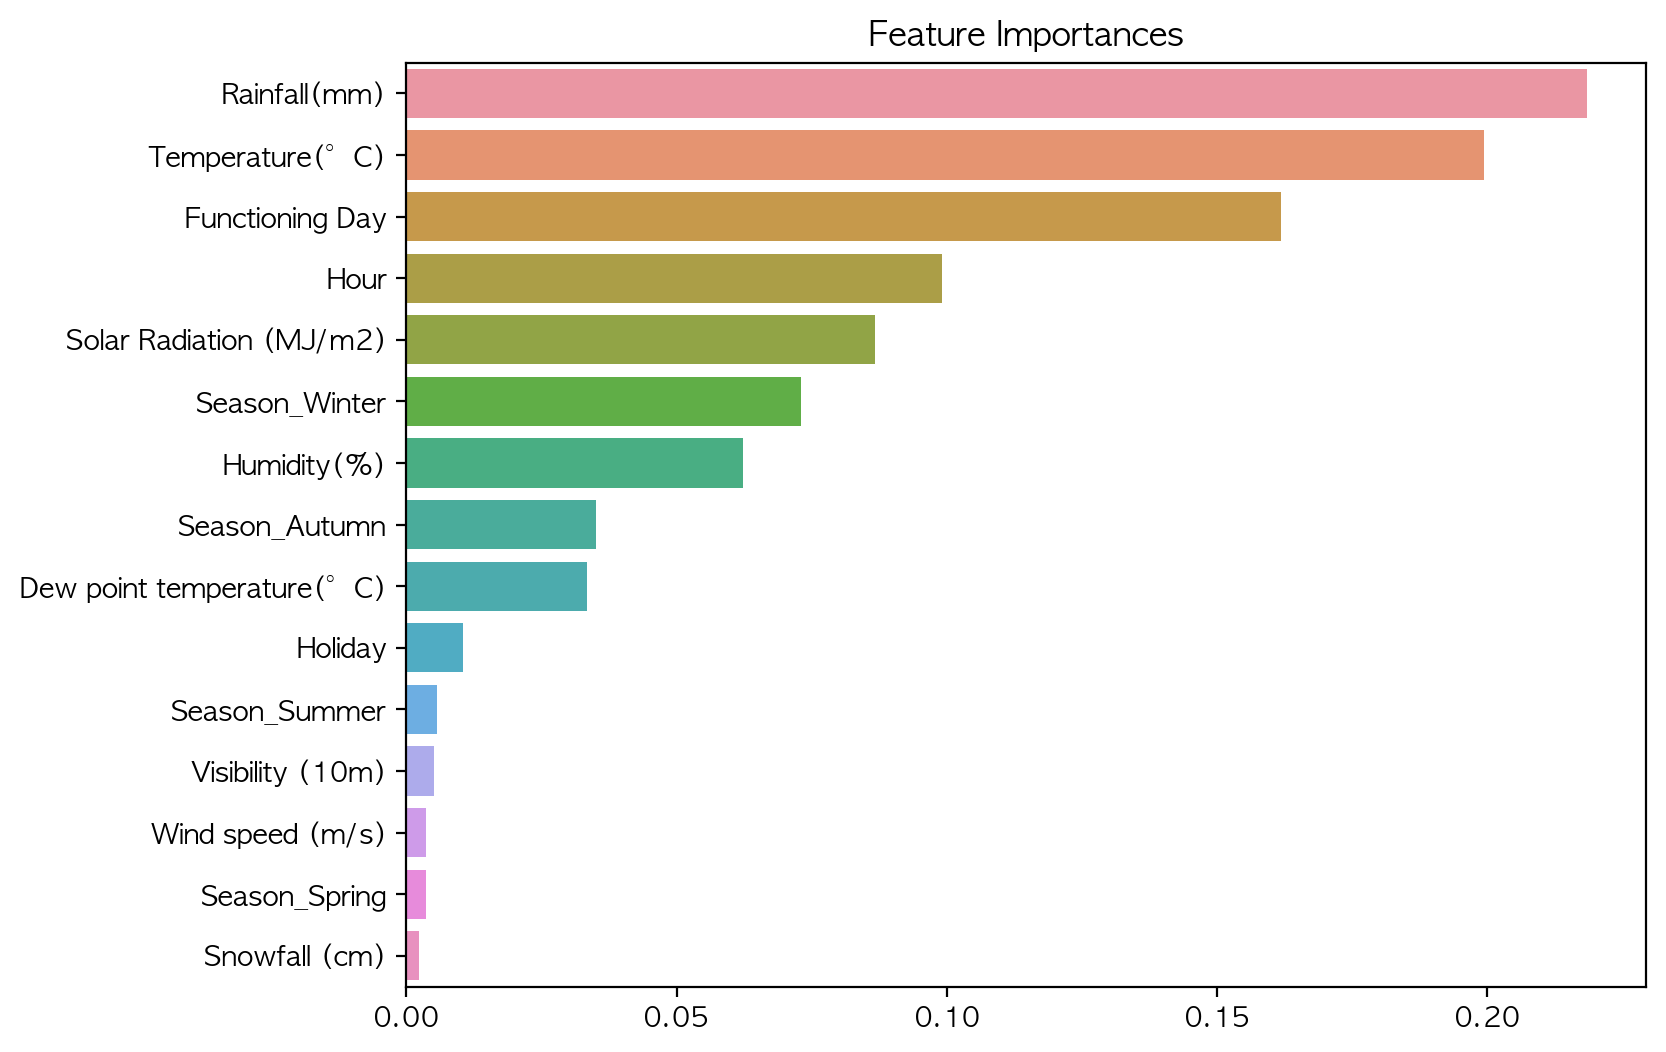

In [265]:
# 변수 중요도 계산

importances_values = pd.Series(model_xg.feature_importances_, index=x_valid.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

# 변수 중요도 별 이유
 ## 온도와 강우량은 이전에 eda과정에서도 확인했듯이, 변수가 중요한것을 파악할 수 있었음, 비슷하게 출퇴근시간 대 대여량이 높았던 시간 변수도 중요하게 사용됐음, 
 ## 작동여부는 0(no) 일때, 대여량이 0 인데 , 너무 높게 중요하게 나옴, 한번 작동여부를 삭제하고 실행해봐야할 것 같음

In [271]:
train = train.drop(['Functioning Day'], axis=1)
test = test1.drop(['Functioning Day'], axis=1)

In [272]:
X_train2 = train.drop(['Rented Bike Count'], axis = 1).copy()
y_train2 = train['Rented Bike Count'].copy()


x_train2, x_valid2, y_train2, y_valid2 = train_test_split(X_train2, y_train2, 
                                                      test_size=0.2,
                                                      shuffle=True, random_state = 0)

In [273]:
# 모델 초기화 및 매개변수 설정
model_xg2 = XGBRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 훈련
model_xg2.fit(x_train2, y_train2)

pred_xg2 = model_xg2.predict(x_valid2)

In [274]:
evaluate_regression(y_valid2,pred_xg2) #오히려 R^2 값이 낮아짐,

(180.75606880711382, 86916.71760891404, 0.7948576656472945)

# XGB 모델을 사용하기로 결정

In [435]:
final_model = XGBRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)
final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [436]:
final_pred = final_model.predict(test)

In [433]:
# 특성 이름 변경
test.rename(columns={'Seasons_Autumn': 'Season_Autumn',
                     'Seasons_Spring': 'Season_Spring',
                     'Seasons_Summer': 'Season_Summer',
                     'Seasons_Winter': 'Season_Winter'}, inplace=True)


In [440]:
Target = pd.DataFrame(final_pred,columns=['Rented Bike Count'])
test = pd.concat([test, Target],axis=1)

In [441]:
test

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Rented Bike Count
0,0,5.7,62,2.300000,1909,-1.0,0.0,0.0,0.0,0,1,1,0,0,0,517.827820
1,1,5.1,65,1.600000,1932,-0.9,0.0,0.0,0.0,0,1,1,0,0,0,429.063080
2,2,4.4,64,1.396285,2000,-1.8,0.0,0.0,0.0,0,1,1,0,0,0,377.480774
3,3,4.2,65,0.700000,1962,-1.8,0.0,0.0,0.0,0,1,1,0,0,0,302.336273
4,4,3.6,70,0.800000,1934,-1.3,0.0,0.0,0.0,0,1,1,0,0,0,272.834595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19,4.2,34,2.600000,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0,1,400.887787
716,20,3.4,37,2.300000,2000,-9.9,0.0,0.0,0.0,0,1,1,0,0,0,1073.577881
717,21,2.6,39,0.300000,1968,-9.9,0.0,0.0,0.0,0,1,1,0,0,0,1032.440063
718,22,2.1,41,1.000000,1859,-9.8,0.0,0.0,0.0,0,1,1,0,0,0,985.354370


In [443]:
test.to_csv('test_예측완료.csv',index = False)